In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import optbinning as opt
%matplotlib inline
import pandas as pd
from sklearn.impute import SimpleImputer
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.preprocessing import OneHotEncoder, StandardScaler,KBinsDiscretizer, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import mannwhitneyu ,chi2_contingency, anderson, f_oneway
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")

(CVXPY) Feb 25 03:37:14 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Feb 25 03:37:14 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


In [2]:
data=pd.read_csv("../data/application_train_vf.csv",parse_dates=["date_mensuelle"], index_col=0)

In [3]:
data["SK_ID_CURR"].value_counts().max()

1

In [4]:
data["NAME_CONTRACT_TYPE"].value_counts()

NAME_CONTRACT_TYPE
Cash loans         276940
Revolving loans     29167
Name: count, dtype: int64

In [5]:
pd.DataFrame(data.isna().mean())

0
SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
CNT_CHILDREN                  0.000000
AMT_INCOME_TOTAL              0.000000
AMT_CREDIT                    0.000000
AMT_ANNUITY                   0.000039
AMT_GOODS_PRICE               0.000905
NAME_TYPE_SUITE               0.004201
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
REGION_POPULATION_RELATIVE    0.000000
DAYS_BIRTH                    0.000000
DAYS_EMPLOYED                 0.000000
DAYS_REGISTRATION             0.000000
DAYS_ID_PUBLISH               0.000000
OWN_CAR_AGE                   0.659776
FLAG_MOBIL                    0.000000
FLAG_EMP_PHONE                0.000000
FLAG_WORK_PHONE               0.000000
FLAG_CONT_MOBILE              0.000000
FLAG_PHONE                    0.000000
FLAG_EMAIL                    0.000000
OCCUPATION_TYPE               0.313776
CNT_FAM_MEMBERS               0.000007
REGION_RATING_CLIENT          0.000000
REGION_RATING_CLIENT_W_CITY   0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
HOUR_APPR_PROCESS_START       0.000000
REG_REGION_NOT_LIVE_REGION    0.000000
REG_REGION_NOT_WORK_REGION    0.000000
LIVE_REGION_NOT_WORK_REGION   0.000000
REG_CITY_NOT_LIVE_CITY        0.000000
REG_CITY_NOT_WORK_CITY        0.000000
LIVE_CITY_NOT_WORK_CITY       0.000000
ORGANIZATION_TYPE             0.000000
EXT_SOURCE_1                  0.563738
EXT_SOURCE_2                  0.002143
EXT_SOURCE_3                  0.198101
APARTMENTS_AVG                0.507179
BASEMENTAREA_AVG              0.584933
YEARS_BEGINEXPLUATATION_AVG   0.487535
YEARS_BUILD_AVG               0.664741
COMMONAREA_AVG                0.698550
ELEVATORS_AVG                 0.532680
ENTRANCES_AVG                 0.503180
FLOORSMAX_AVG                 0.497306
FLOORSMIN_AVG                 0.678256
LANDAREA_AVG                  0.593515
LIVINGAPARTMENTS_AVG          0.683349
LIVINGAREA_AVG                0.501668
NONLIVINGAPARTMENTS_AVG       0.694123
NONLIVINGAREA_AVG             0.551533
APARTMENTS_MODE               0.507179
BASEMENTAREA_MODE             0.584933
YEARS_BEGINEXPLUATATION_MODE  0.487535
YEARS_BUILD_MODE              0.664741
COMMONAREA_MODE               0.698550
ELEVATORS_MODE                0.532680
ENTRANCES_MODE                0.503180
FLOORSMAX_MODE                0.497306
FLOORSMIN_MODE                0.678256
LANDAREA_MODE                 0.593515
LIVINGAPARTMENTS_MODE         0.683349
LIVINGAREA_MODE               0.501668
NONLIVINGAPARTMENTS_MODE      0.694123
NONLIVINGAREA_MODE            0.551533
APARTMENTS_MEDI               0.507179
BASEMENTAREA_MEDI             0.584933
YEARS_BEGINEXPLUATATION_MEDI  0.487535
YEARS_BUILD_MEDI              0.664741
COMMONAREA_MEDI               0.698550
ELEVATORS_MEDI                0.532680
ENTRANCES_MEDI                0.503180
FLOORSMAX_MEDI                0.497306
FLOORSMIN_MEDI                0.678256
LANDAREA_MEDI                 0.593515
LIVINGAPARTMENTS_MEDI         0.683349
LIVINGAREA_MEDI               0.501668
NONLIVINGAPARTMENTS_MEDI      0.694123
NONLIVINGAREA_MEDI            0.551533
FONDKAPREMONT_MODE            0.683637
HOUSETYPE_MODE                0.501436
TOTALAREA_MODE                0.482403
WALLSMATERIAL_MODE            0.508133
EMERGENCYSTATE_MODE           0.473684
OBS_30_CNT_SOCIAL_CIRCLE      0.003329
DEF_30_CNT_SOCIAL_CIRCLE      0.003329
OBS_60_CNT_SOCIAL_CIRCLE      0.003329
DEF_60_CNT_SOCIAL_CIRCLE      0.003329
DAYS_LAST_PHONE_CHANGE        0.000003
FLAG_DOCUMENT_2               0.000000
FLAG_DOCUMENT_3               0.000000
FLAG_DOCUMENT_4               0.000000
FLAG_DOCUMENT_5               0.000000
FLAG_DOCUMENT_6               0.000000
FLAG_DOCUMENT_7               0.000000
FLAG_DOCUMENT_8     

In [6]:
data["TARGET"].value_counts(normalize=True)

TARGET
0    0.923285
1    0.076715
Name: proportion, dtype: float64

#### Variables CREDIT BUREAU

In [7]:
credit_bureau_data=pd.read_csv("../data/cb_findings.csv", index_col=0)
data=data.merge(credit_bureau_data, left_on="SK_ID_CURR", right_on="CB_SK_ID_CURR")

In [8]:
credit_bureau_data.isna().mean()

CB_SK_ID_CURR             0.0
CB_AMT_CREDIT_SUM_DEBT    0.0
CB_NB_CREDIT_ACTIVE       0.0
CB_NB_CREDIT_CLOSED       0.0
CB_DAYS_CREDIT            0.0
CB_DAYS_CREDIT_ENDDATE    0.0
CB_AMT_CREDIT_SUM         0.0
CB_AMT_ANNUITY            0.0
dtype: float64

#### Etudes des variables -- prédicteurs potentiels

In [9]:
data.dtypes

SK_ID_CURR                               int64
TARGET                                   int64
NAME_CONTRACT_TYPE                      object
CODE_GENDER                             object
FLAG_OWN_CAR                            object
FLAG_OWN_REALTY                         object
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
AMT_ANNUITY                            float64
AMT_GOODS_PRICE                        float64
NAME_TYPE_SUITE                         object
NAME_INCOME_TYPE                        object
NAME_EDUCATION_TYPE                     object
NAME_FAMILY_STATUS                      object
NAME_HOUSING_TYPE                       object
REGION_POPULATION_RELATIVE             float64
DAYS_BIRTH                               int64
DAYS_EMPLOYED                            int64
DAYS_REGISTRATION                      float64
DAYS_ID_PUBLISH                          int64
OWN_CAR_AGE  

In [11]:
data["HAS_CHILDREN"]=data["CNT_CHILDREN"].apply(lambda x : "Y" if x > 0 else "N")
data.drop(columns=["CNT_CHILDREN"], inplace=True)

In [12]:
data.nunique()

SK_ID_CURR                      306107
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
AMT_INCOME_TOTAL                  2545
AMT_CREDIT                        5597
AMT_ANNUITY                      13667
AMT_GOODS_PRICE                   1000
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12571
DAYS_REGISTRATION                15687
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE               

In [13]:
drop_documents_cols=["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4" , 
"FLAG_DOCUMENT_5" , "FLAG_DOCUMENT_6","FLAG_DOCUMENT_7" ,              
"FLAG_DOCUMENT_8" , "FLAG_DOCUMENT_9","FLAG_DOCUMENT_10"  ,"FLAG_DOCUMENT_11" , "FLAG_DOCUMENT_12",              
"FLAG_DOCUMENT_13" ,"FLAG_DOCUMENT_14" ,"FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16" ,
"FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18","FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"]

In [14]:
data.drop(columns=drop_documents_cols, inplace=True)

In [15]:
def convert_numeric_to_category(df: pd.DataFrame):
    for colname in df.columns.tolist():
        if (df[colname].dtype=="number") & (df[colname].nunique() <=10):
            df[colname]=df[colname].astype("category")
            pass
        else:
            pass

In [16]:
convert_numeric_to_category(data)

In [17]:
data["date_annee"]=data["date_mensuelle"].dt.year

In [18]:
out_of_sample_data=data[data["date_annee"]==2020]
data=data[data["date_annee"]<2020]

In [19]:
out_of_sample_data["TARGET"].value_counts(normalize=True)


TARGET
0    0.920863
1    0.079137
Name: proportion, dtype: float64

In [20]:
data["TARGET"].value_counts(normalize=True)

TARGET
0    0.923632
1    0.076368
Name: proportion, dtype: float64

In [21]:
categorical_vars=data.select_dtypes(include="object").columns.tolist()
numerical_vars=data.select_dtypes(include="number").columns.tolist()
binary_vars=[var for var in numerical_vars if (data[var].nunique()==2)&(var !="TARGET")]

In [24]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


def mannwhitney_test(df:pd.DataFrame,variable:str,target:str):
    # Séparer les données en deux groupes en fonction de la variable cible
    group_1 = df[df[target] == 0]
    group_2 = df[df[target] == 1]

    stat, p_value = mannwhitneyu(group_1[variable].dropna(), group_2[variable].dropna())
    # Afficher les résultats
    print(f"Variable: {variable}")
    print(f"Mann-Whitney U-statistic: {stat}")
    print(f"P-value: {p_value}")
    print(10*"===")
    
    pass


def calculate_information_value_from_contingency_table(contingency_table):
    """
    Calculer l'Information Value à partir d'une table de contingence.
    
    Args:
        contingency_table (pd.DataFrame): La table de contingence entre la variable et la target.
        
    Returns:
        float: L'Information Value calculé.
    """
    non_event_rate=contingency_table.iloc[0]/(contingency_table.iloc[0].sum())
    event_rate=contingency_table.iloc[1]/(contingency_table.iloc[1].sum())
    iv=0
    if (non_event_rate.min() > 0) & (event_rate.mean() >0) :
        for col in non_event_rate.index:
            iv += (event_rate[col] - non_event_rate[col])*np.log(event_rate[col] / non_event_rate[col])

    return iv

In [189]:

def show_volume_stability_overtime(data:pd.DataFrame,colname:str,threshold=0.05):
        # Calcul des pourcentages pour chaque modalité au fil du temps
    resultats = data[[colname, "date_annee"]].groupby(by=["date_annee"]).value_counts(normalize=True).unstack().fillna(0)

    # Affichage des lineplots
    sns.set(style="whitegrid")
    resultats.plot(kind='line', marker='o', markersize=8)
    plt.title('Pourcentage de chaque modalité au fil du temps')
    plt.hlines(y=threshold, xmin=data["date_annee"].min(), xmax=data["date_annee"].max(), linestyles="dashed")
    plt.xlabel('Temps')
    plt.ylabel('Pourcentage')
    plt.legend(title=f"{colname}")
    plt.show()
    
    
def show_risk_stability_overtime(data:pd.DataFrame,colname:str):
    result = data.groupby([colname, "date_annee"])['TARGET'].value_counts(normalize=True).unstack().fillna(0)[1]

    # Tracer le lineplot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=result.index.get_level_values("date_annee"), y=result.values, hue=result.index.get_level_values(f"{colname}"), marker='o')

    # Ajouter des étiquettes et un titre
    plt.xlabel('date_annee')
    plt.ylabel('Taux de défaut')
    plt.title(f"Taux de défaut en fonction de {colname} et année")

    # Ajouter une légende
    plt.legend(title=f"{colname}")

    # Afficher le graphique
    plt.show()
    

#### Test de stabilité en risque des variables binaires

In [29]:
binary_vars

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [30]:
data["FLAG_MOBIL"].value_counts()

FLAG_MOBIL
1    267742
0         1
Name: count, dtype: int64

In [ ]:
for var in binary_vars:
    show_risk_stability_overtime(data,var)

In [32]:
#### variables à écarter : flag_mobil, flag_cont_mobil, flag_email, reg_region_not_live_region, reg_region_not_work_region,live_region_not_work_region, 

In [33]:
binary_risk_non_stable_vars=["FLAG_MOBIL", "FLAG_CONT_MOBILE", "FLAG_EMAIL", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION"]

In [34]:
binary_vars=list(filter(lambda x : x not in binary_risk_non_stable_vars, binary_vars))

In [35]:
from scipy.stats import chi2_contingency

In [36]:
for col in binary_vars:
    print(col)
    print(chi2_contingency(pd.crosstab(data["TARGET"], data[col].dropna())))
    print(60*"=")

FLAG_EMP_PHONE
Chi2ContingencyResult(statistic=541.1118770439443, pvalue=1.0803051842837344e-119, dof=1, expected_freq=array([[ 44627.12687913, 202668.87312087],
       [  3689.87312087,  16757.12687913]]))
FLAG_WORK_PHONE
Chi2ContingencyResult(statistic=200.62867268099427, pvalue=1.522798701766882e-45, dof=1, expected_freq=array([[198169.86169573,  49126.13830427],
       [ 16385.13830427,   4061.86169573]]))
FLAG_PHONE
Chi2ContingencyResult(statistic=152.80251594616982, pvalue=4.2309016724815076e-35, dof=1, expected_freq=array([[177762.21286831,  69533.78713169],
       [ 14697.78713169,   5749.21286831]]))
REG_CITY_NOT_LIVE_CITY
Chi2ContingencyResult(statistic=543.0070018670028, pvalue=4.1808917939176664e-120, dof=1, expected_freq=array([[227959.76428142,  19336.23571858],
       [ 18848.23571858,   1598.76428142]]))
REG_CITY_NOT_WORK_CITY
Chi2ContingencyResult(statistic=656.1838232140383, pvalue=1.009860040261178e-144, dof=1, expected_freq=array([[190480.62537583,  56815.37462417],

#### Test de stabilité en volume des variables binaires

In [ ]:
for var in binary_vars:
    show_volume_stability_overtime(data,var)

In [38]:
#### variables à virer : flag_mobil , flag_cont_mobil,reg_region_not_live_region, live_region_not_work_region

In [39]:
binary_volume_non_stable_vars=[]

In [40]:
# variables à virer parmi les binaires:
binary_non_stable_vars=list(set(binary_volume_non_stable_vars+binary_risk_non_stable_vars))

In [41]:
binary_vars=list(filter(lambda x : x not in binary_non_stable_vars,binary_vars))

In [42]:
data.drop(columns=binary_non_stable_vars, inplace=True)

In [43]:
numerical_vars=list(filter(lambda x : x not in binary_vars+binary_non_stable_vars,numerical_vars))

In [44]:
numerical_vars

['SK_ID_CURR',
 'TARGET',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 '

#### Model Benchmark

#### Test de stabilité des variables catégorielles à faible modalité (2-4)

In [45]:
low_category_categorical_vars=[var for var in categorical_vars+numerical_vars if  (var not in binary_vars+binary_non_stable_vars+["TARGET"]) & (data[var].nunique()>=2) & (data[var].nunique()<=4)]

In [46]:
low_category_categorical_vars

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'HAS_CHILDREN',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY']

In [ ]:
for colname in low_category_categorical_vars:
    show_volume_stability_overtime(data,colname)

In [ ]:
for col in low_category_categorical_vars:
    show_risk_stability_overtime(data,col)

In [49]:
low_category_non_stable_vars=["FLAG_OWN_REALTY", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "EMERGENCYSTATE_MODE"]
low_category_categorical_vars=list(filter(lambda x : x not in low_category_non_stable_vars,low_category_categorical_vars))

In [51]:
data["CODE_GENDER"]=data["CODE_GENDER"].apply(lambda x: "F" if x =="XNA" else x )

In [52]:
data.drop(columns=low_category_non_stable_vars)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE        OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
0           333721       0         Cash loans           M            Y          292500.0   1102500.0      32364.0        1102500.0          Family               Working  Secondary / secondary special               Married  House / apartment                    0.018209      -11763           -688             -500.0            -3325          9.0               1                0           1                Drivers              3.0                     3                            3                   THURSDAY                        9                       0                       0                        0  Transport: type 3           NaN      0.616187      0.651260          0.2938            0.1995                       0.9891              NaN             NaN           0.28         0.2414         0.3750            NaN        0.1346                   NaN          0.0645                      NaN             0.0028           0.2994             0.2070                        0.9891   
1           250254       0         Cash loans           F            N          180000.0    270000.0      10179.0         270000.0   Unaccompanied               Working               Higher education               Married       With parents                    0.003122      -12460          -2988            -1576.0             -454          NaN               1                0           1  High skill tech staff              2.0                     3                            3                   THURSDAY                       10                       0                       0                        0         University           NaN      0.548623      0.413597             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN                   NaN             NaN                      NaN                NaN              NaN                NaN                           NaN   
2           265071       0         Cash loans           F            Y           67500.0     80865.0       7546.5          67500.0        Children               Working  Secondary / secondary special               Married  House / apartment                    0.018634      -11118           -907           -10654.0             -425          9.0               1                1           0               Laborers              4.0                     2                            2                     MONDAY                       10                       0                       0                        0         Government      0.282297      0.582081      0.399676          0.1237            0.0493                       0.9861              NaN             NaN           0.00         0.2759         0.1667            NaN        0.0678                   NaN          0.1103                      NaN             0.0000           0.1261             0.0511                        0.9861   
3           227569       0         Cash loans           

#### Test de stabilité des autres variables catégorielles

In [53]:
categorical_vars=list(filter(lambda x : x not in binary_non_stable_vars+binary_vars+low_category_categorical_vars+low_category_non_stable_vars, categorical_vars))

In [54]:
for col in categorical_vars:
    print(data[col].value_counts(normalize=True))
    print(40*"=")

NAME_TYPE_SUITE
Unaccompanied      0.811612
Family             0.130728
Spouse, partner    0.037344
Children           0.010734
Other_B            0.005817
Other_A            0.002892
Group of people    0.000874
Name: proportion, dtype: float64
NAME_INCOME_TYPE
Working                 0.516693
Commercial associate    0.232245
Pensioner               0.180374
State servant           0.070489
Unemployed              0.000078
Student                 0.000063
Businessman             0.000037
Maternity leave         0.000019
Name: proportion, dtype: float64
NAME_EDUCATION_TYPE
Secondary / secondary special    0.709565
Higher education                 0.243984
Incomplete higher                0.033457
Lower secondary                  0.012471
Academic degree                  0.000523
Name: proportion, dtype: float64
NAME_FAMILY_STATUS
Married                 0.638702
Single / not married    0.147683
Civil marriage          0.096791
Separated               0.064472
Widow                   0.0

In [55]:
for col in categorical_vars:
    n=data.shape[0]
    contingency_table=pd.crosstab(data["TARGET"], data[col])
    chi2, p, _, _ = chi2_contingency(contingency_table, correction=True) #Application d'une correction de Yates par rapport à la faible représentation des classes
    k, r = contingency_table.shape
    v_cramer = np.sqrt(chi2 / (n * min(k-1, r-1)))
    print(f"\nCrosstab for {col}:\n")
    print(contingency_table)
    print("\n" + "-"*40)
    print(f"\nChi-squared: {chi2}")
    print(f"P-value: {p}")
    print(f"Cramer's V: {v_cramer}")
    print("\n" + "="*80)
    


Crosstab for NAME_TYPE_SUITE:

NAME_TYPE_SUITE  Children  Family  Group of people  Other_A  Other_B  Spouse, partner  Unaccompanied
TARGET                                                                                              
0                    2663   32422              212      708     1410             9206         199618
1                     199    2434               21       63      141              751          16782

----------------------------------------

Chi-squared: 32.93561535029819
P-value: 1.0789214169849494e-05
Cramer's V: 0.011091079756998187


Crosstab for NAME_INCOME_TYPE:

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  Pensioner  State servant  Student  Unemployed  Working
TARGET                                                                                                                      
0                          10                 57789                3      45843          17853       17          13   125768
1               

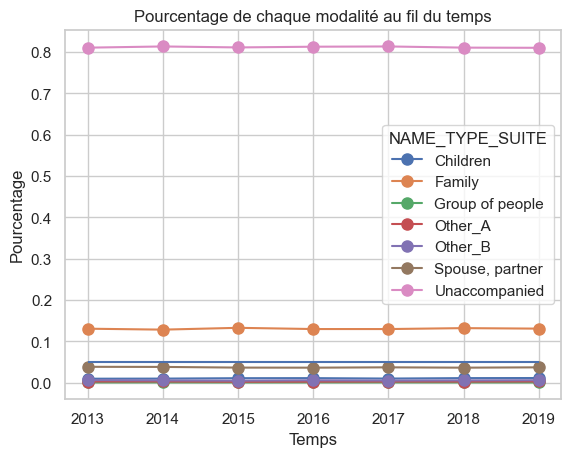

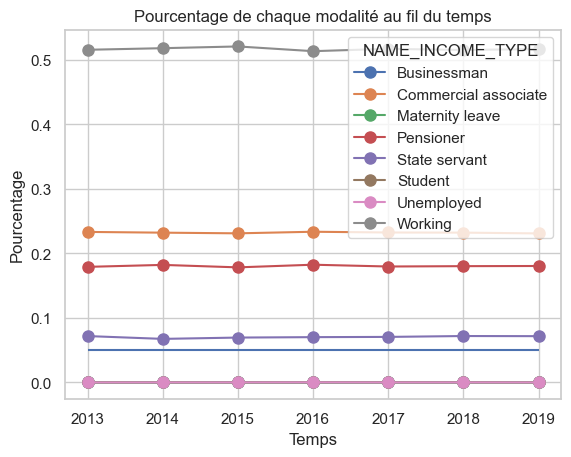

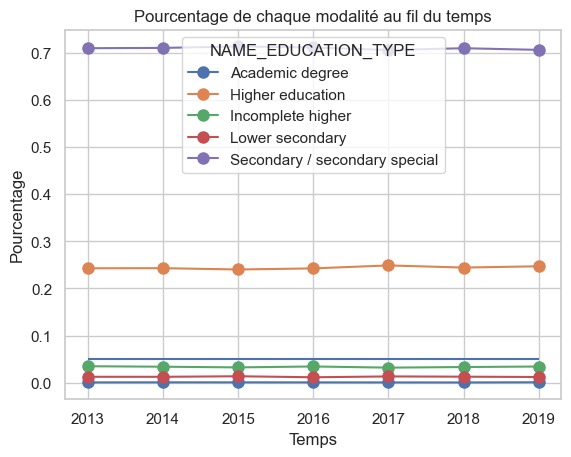

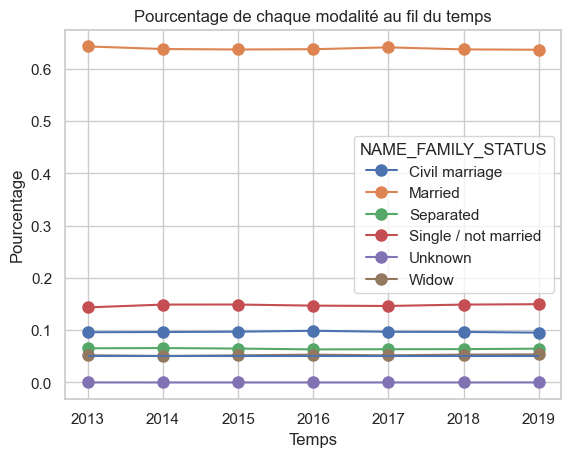

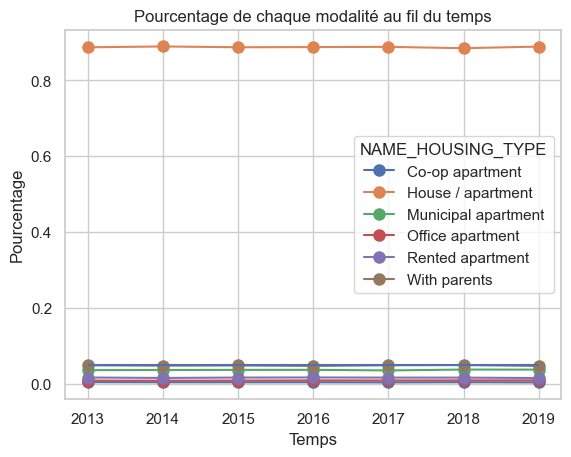

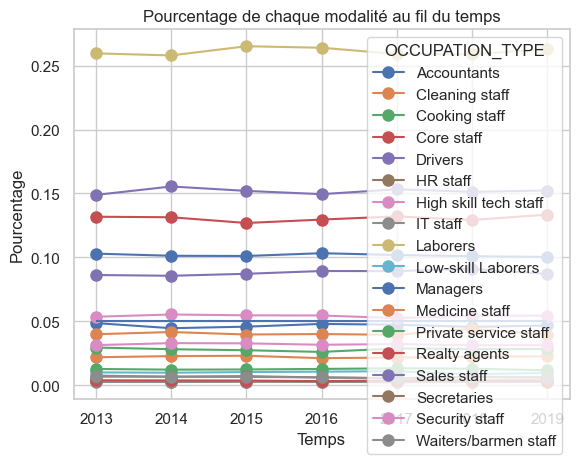

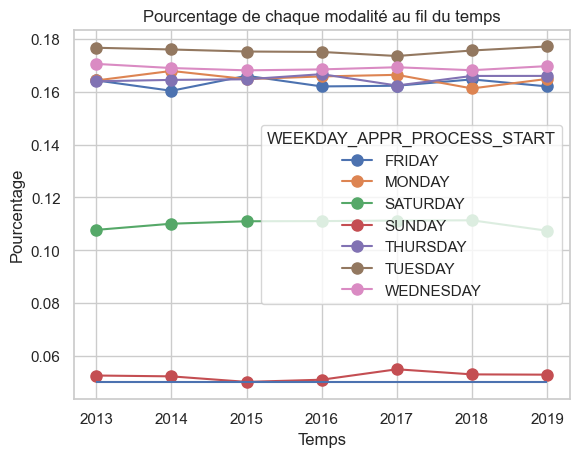

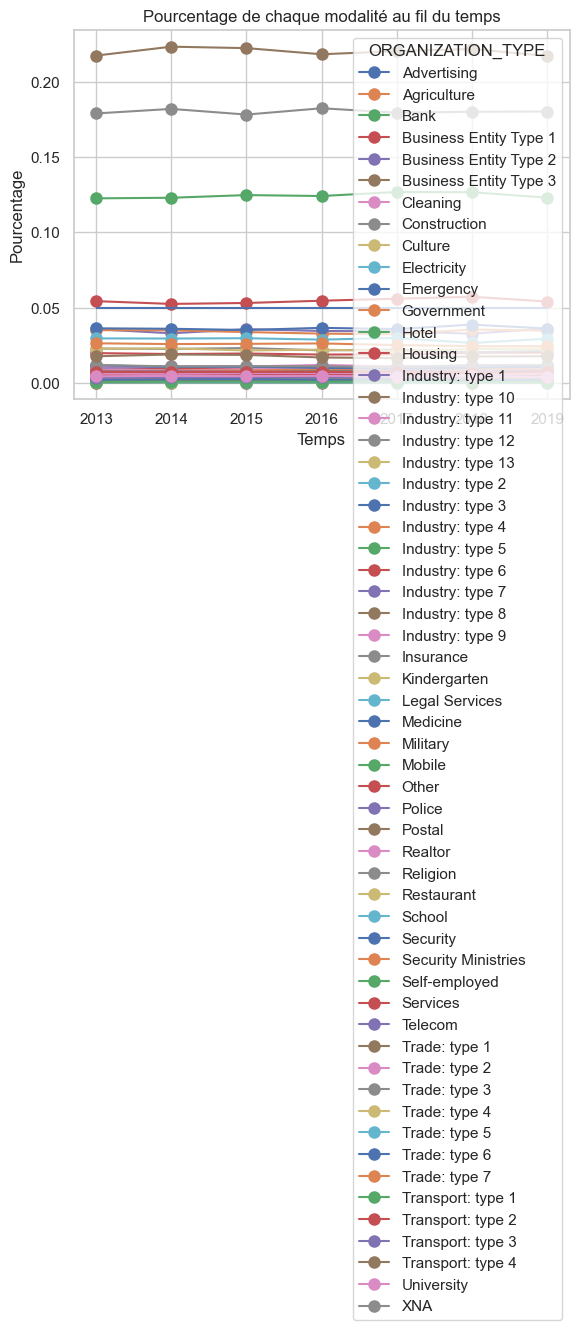

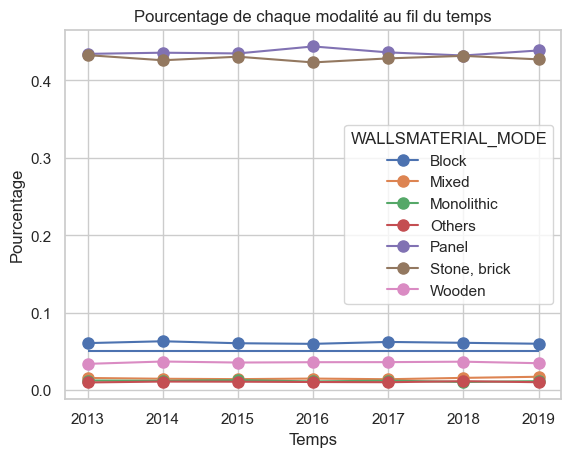

In [56]:
for col in categorical_vars:
    show_volume_stability_overtime(data,col)

In [57]:
data["OCCUPATION_TYPE"].value_counts(normalize=True)

OCCUPATION_TYPE
Laborers                 0.261152
Sales staff              0.151804
Core staff               0.130603
Managers                 0.101638
Drivers                  0.087913
High skill tech staff    0.054129
Accountants              0.046594
Medicine staff           0.040556
Security staff           0.031856
Cooking staff            0.027979
Cleaning staff           0.022116
Private service staff    0.012457
Low-skill Laborers       0.009904
Waiters/barmen staff     0.006359
Secretaries              0.006239
Realty agents            0.003577
HR staff                 0.002662
IT staff                 0.002461
Name: proportion, dtype: float64

In [58]:
data["REALTY"]="OWN_REALTY_"+data["FLAG_OWN_REALTY"]+"-TYPE_"+data["NAME_HOUSING_TYPE"]

In [59]:
data["REALTY"].value_counts(normalize=True)

REALTY
OWN_REALTY_Y-TYPE_House / apartment      0.647849
OWN_REALTY_N-TYPE_House / apartment      0.239797
OWN_REALTY_N-TYPE_With parents           0.029917
OWN_REALTY_N-TYPE_Municipal apartment    0.022159
OWN_REALTY_Y-TYPE_With parents           0.018081
OWN_REALTY_Y-TYPE_Municipal apartment    0.014174
OWN_REALTY_N-TYPE_Rented apartment       0.009169
OWN_REALTY_Y-TYPE_Rented apartment       0.006730
OWN_REALTY_Y-TYPE_Office apartment       0.004508
OWN_REALTY_N-TYPE_Office apartment       0.003948
OWN_REALTY_Y-TYPE_Co-op apartment        0.002290
OWN_REALTY_N-TYPE_Co-op apartment        0.001378
Name: proportion, dtype: float64

In [60]:
data["OCCUPATION_TYPE"].fillna("Unknown", inplace=True)

In [61]:
from optbinning import OptimalBinning


In [62]:
binarizer=OptimalBinning(dtype="categorical", max_n_bins=4, divergence="iv")
binarizer.fit(data["OCCUPATION_TYPE"], data["TARGET"], )


OptimalBinning(dtype='categorical', max_n_bins=4)

In [ ]:
group_occupation_type={
    0: ['Accountants', 'HR staff', 'High skill tech staff'],
 1: ['Managers', 'Core staff', 'Private service staff', 'Unknown',
        'Medicine staff', 'IT staff', 'Secretaries'],
 2: ['Realty agents', 'Cleaning staff', 'Sales staff', 'Laborers',
        'Cooking staff', 'Security staff'],
 3: ['Drivers', 'Waiters/barmen staff', 'Low-skill Laborers'],
}

In [ ]:
data["OCCUPATION_TYPE"]=data["OCCUPATION_TYPE"].map({value: key for key, values in group_occupation_type.items() for value in values})

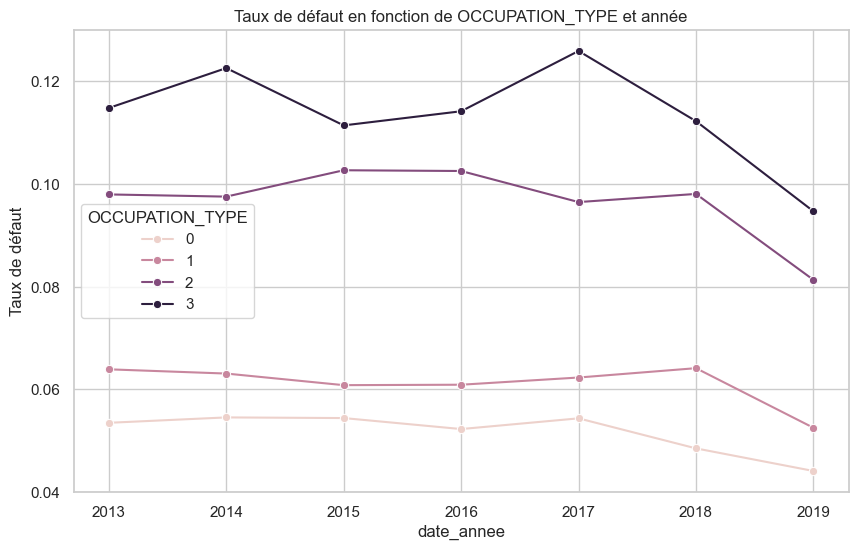

In [65]:
show_risk_stability_overtime(data,"OCCUPATION_TYPE")

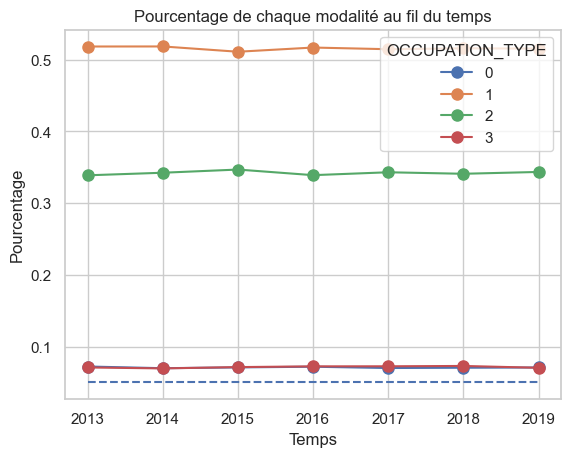

In [197]:
show_volume_stability_overtime(data,"OCCUPATION_TYPE")

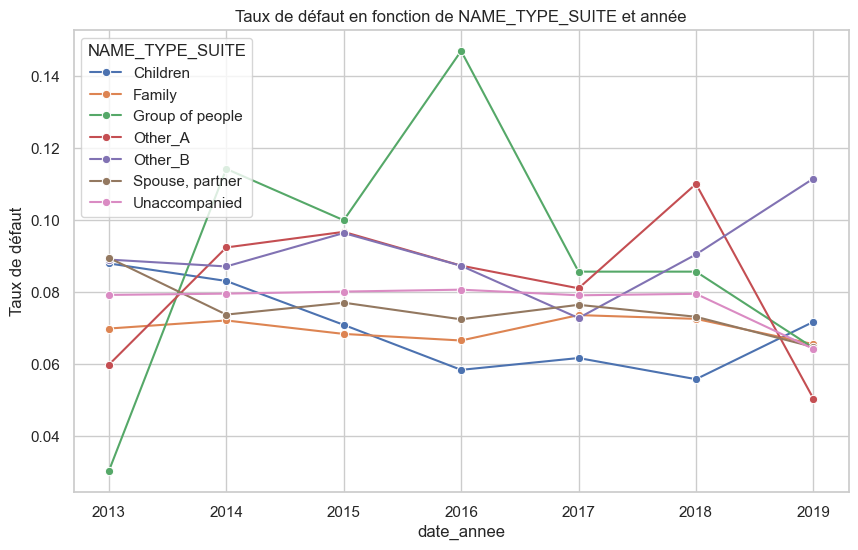

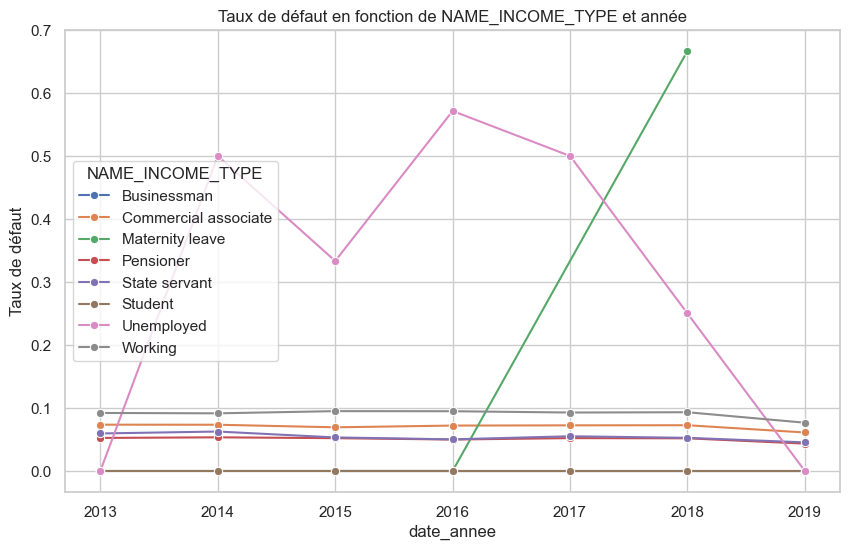

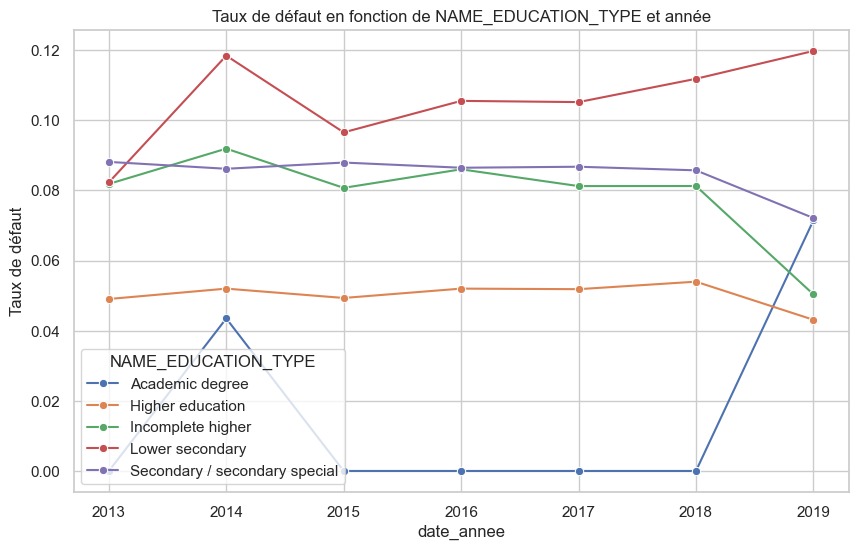

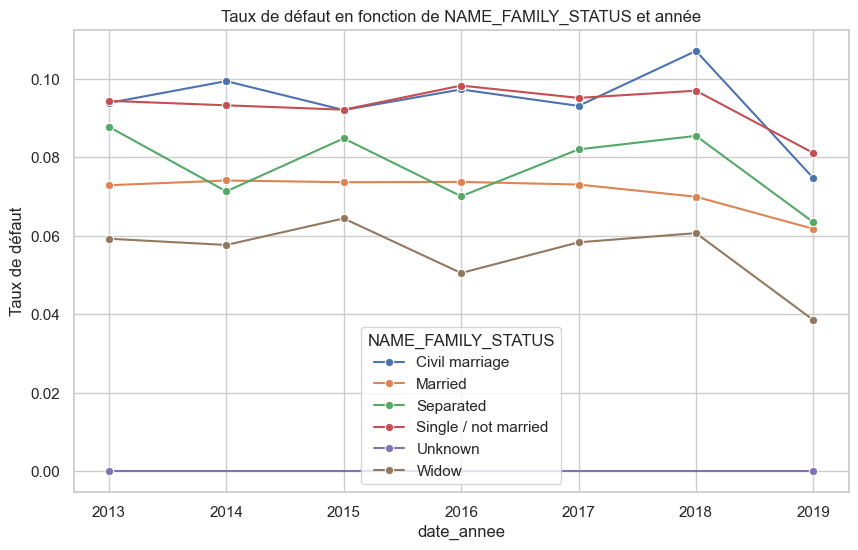

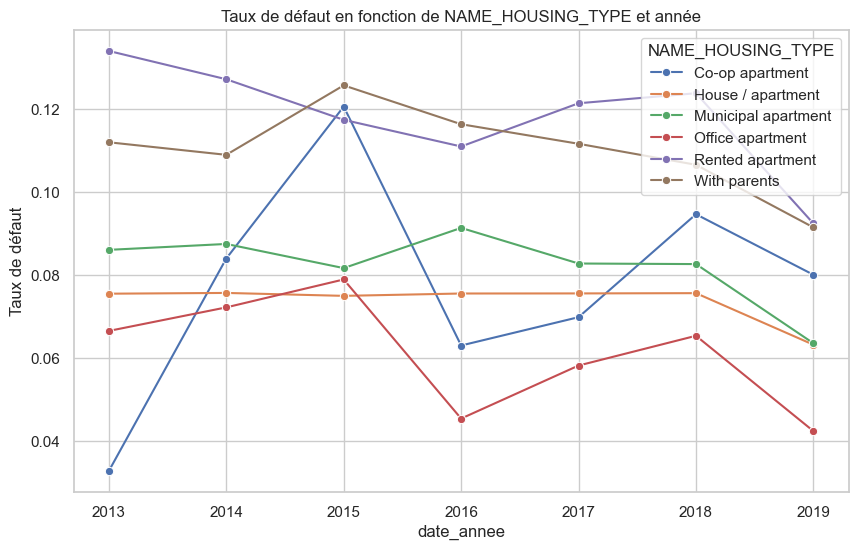

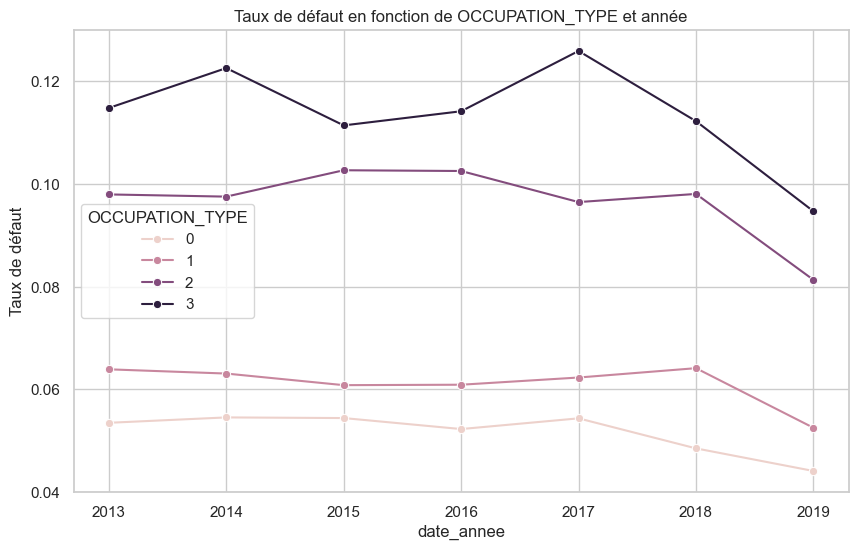

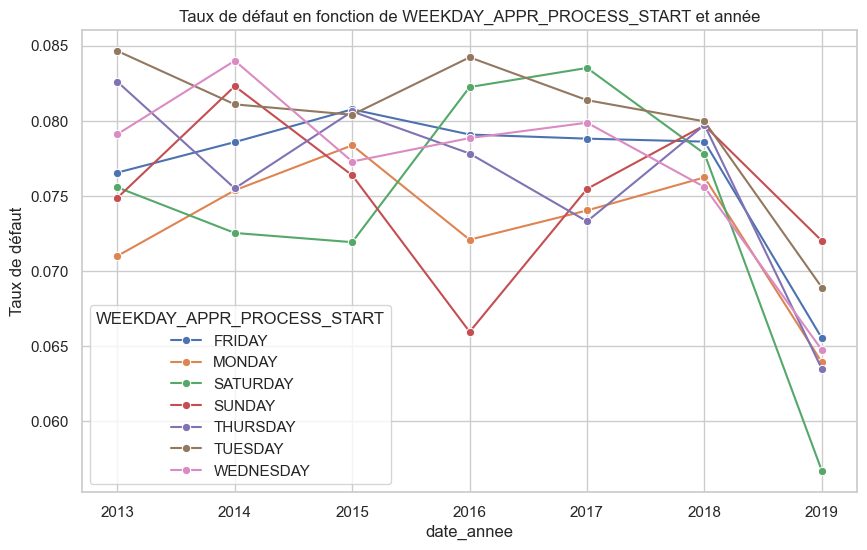

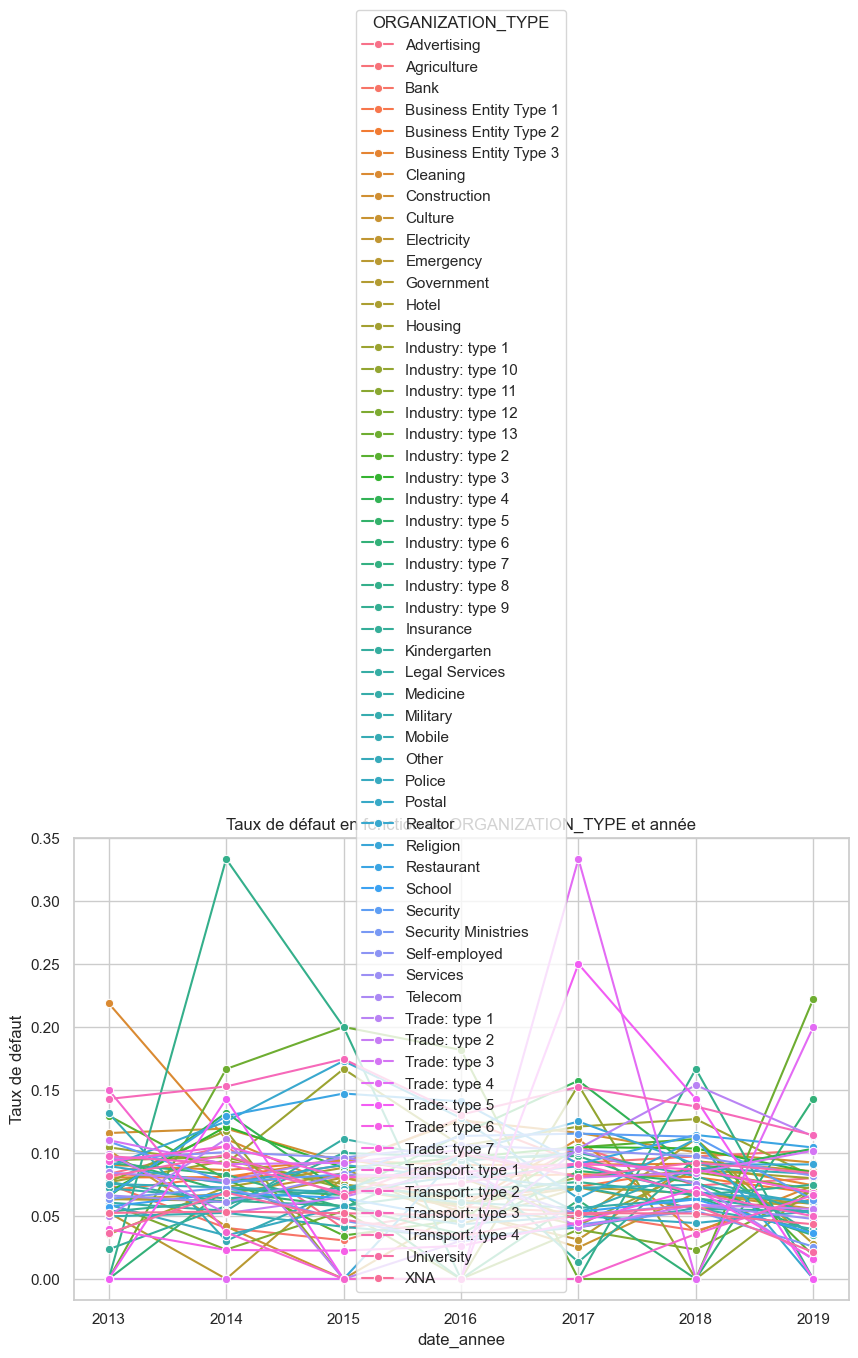

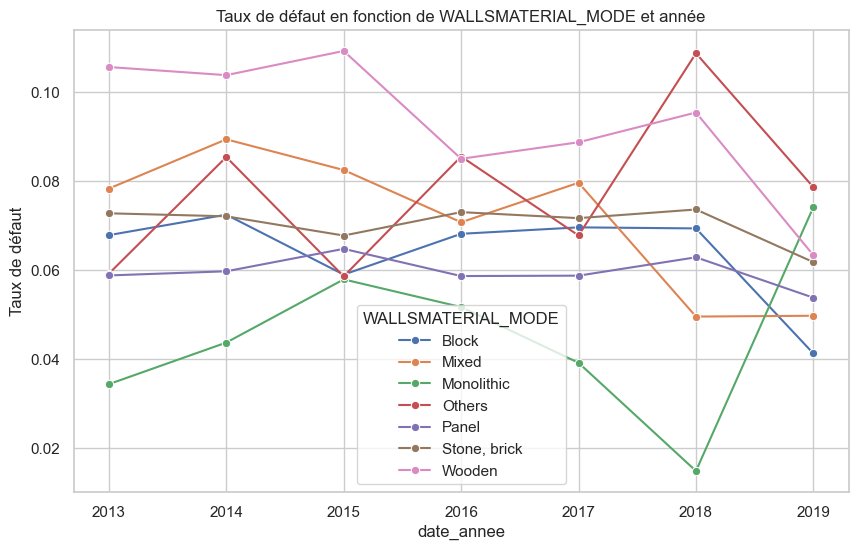

In [66]:
for col in categorical_vars:
    show_risk_stability_overtime(data,col)

In [67]:
group_education_type={
    "Graduated" : ["Academic degree", "Higher education"],
    "Non graduated":["Lower secondary", "Secondary / secondary special", "Incomplete higher"]
}

In [68]:
data["NAME_EDUCATION_TYPE"]=data["NAME_EDUCATION_TYPE"].map({value: key for key, values in group_education_type.items() for value in values})

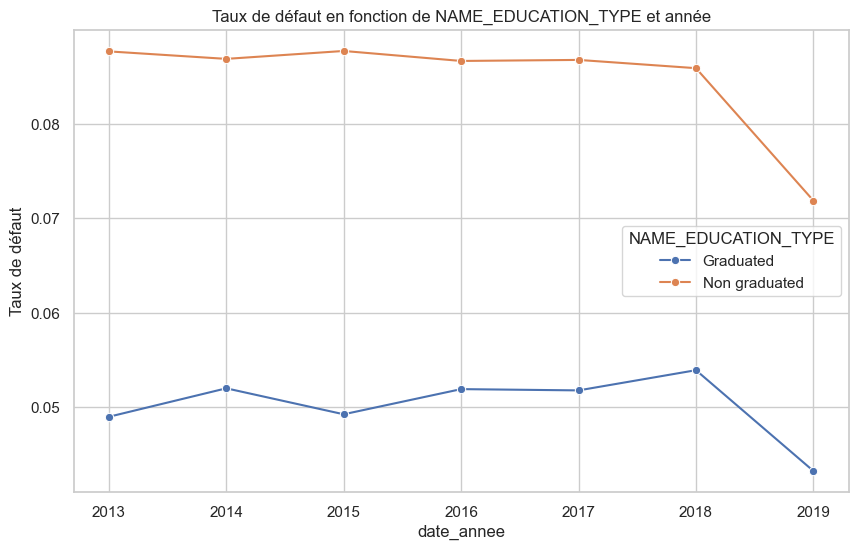

In [69]:
show_risk_stability_overtime(data,"NAME_EDUCATION_TYPE")

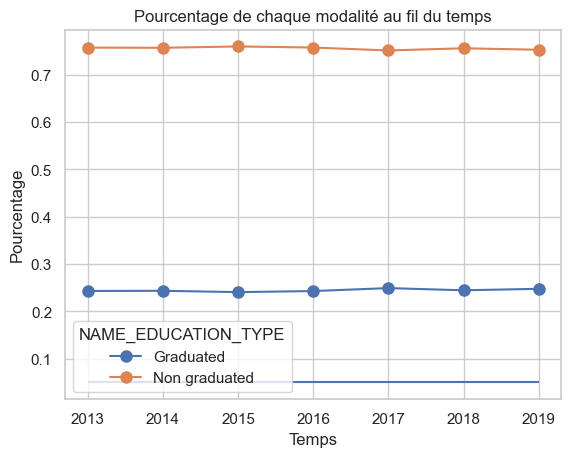

In [70]:
show_volume_stability_overtime(data,"NAME_EDUCATION_TYPE")

In [71]:
group_family_status={
    "Already_Married": ["Civil marriage", "Married","Separated", "Widow"],
    "Single" :["Single / not married", "Unknown"]
    # "Separated": []
}

In [72]:
data["NAME_FAMILY_STATUS_2"]=data["NAME_FAMILY_STATUS"].map({value: key for key, values in group_family_status.items() for value in values})

In [73]:
data["NAME_FAMILY_STATUS"].value_counts(normalize=True)

NAME_FAMILY_STATUS
Married                 0.638702
Single / not married    0.147683
Civil marriage          0.096791
Separated               0.064472
Widow                   0.052345
Unknown                 0.000007
Name: proportion, dtype: float64

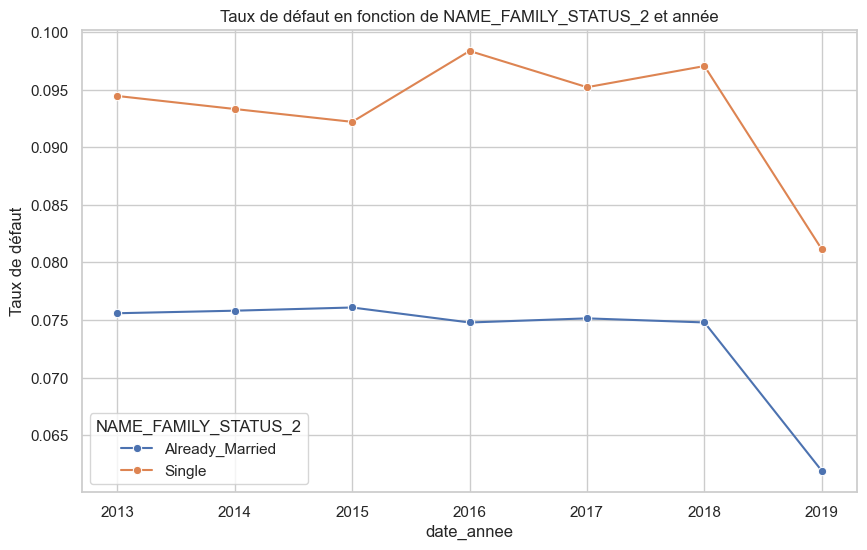

In [74]:
show_risk_stability_overtime(data,"NAME_FAMILY_STATUS_2" )

In [75]:
cramers_v(pd.crosstab(data["HAS_CHILDREN"], data["NAME_FAMILY_STATUS_2"]))

0.1394166751333566

In [76]:
pd.crosstab(data["HAS_CHILDREN"], data["NAME_FAMILY_STATUS_2"])

NAME_FAMILY_STATUS_2  Already_Married  Single
HAS_CHILDREN                                 
N                              153745   33761
Y                               74455    5782

In [77]:
data["FAM_STATS_CHILD"]=data["NAME_FAMILY_STATUS_2"]+"-"+"HAS_CHILDREN_"+data["HAS_CHILDREN"] 

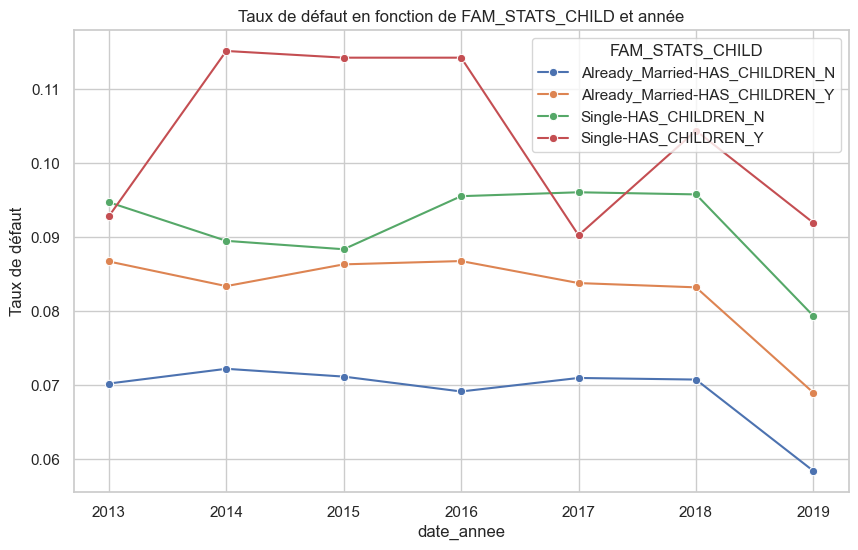

In [78]:
show_risk_stability_overtime(data, "FAM_STATS_CHILD")

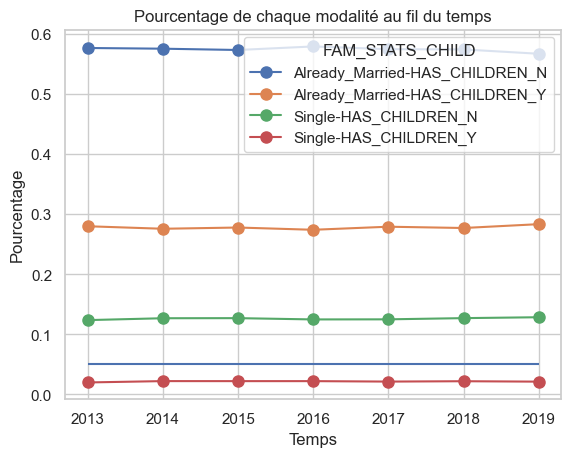

In [79]:
show_volume_stability_overtime(data, "FAM_STATS_CHILD")

In [80]:
data["FAM_STATS_CHILD"].value_counts(normalize=True)

FAM_STATS_CHILD
Already_Married-HAS_CHILDREN_N    0.574226
Already_Married-HAS_CHILDREN_Y    0.278084
Single-HAS_CHILDREN_N             0.126095
Single-HAS_CHILDREN_Y             0.021595
Name: proportion, dtype: float64

In [81]:
data["FAM_STATS_CHILD"]=data["FAM_STATS_CHILD"].apply(lambda x : "Single" if x in ["Single-HAS_CHILDREN_N","Single-HAS_CHILDREN_Y"] else x)

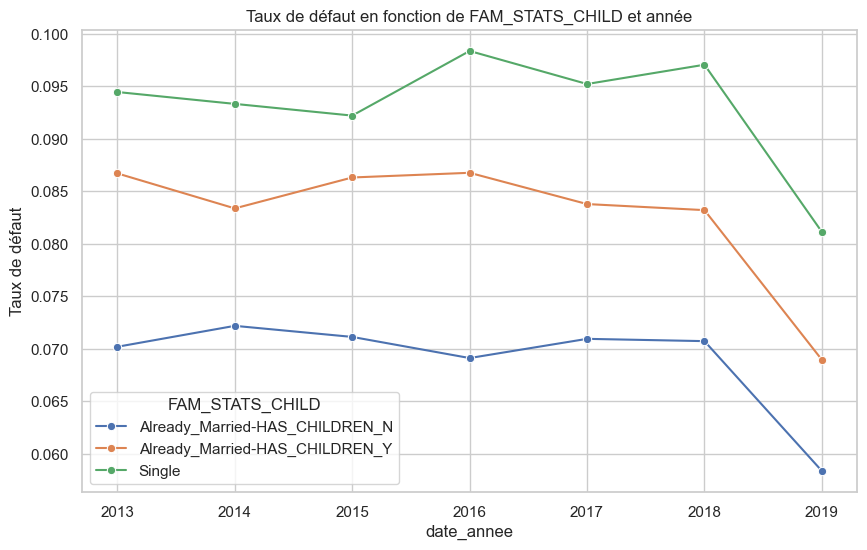

In [82]:
show_risk_stability_overtime(data, "FAM_STATS_CHILD")

In [83]:
cramers_v(pd.crosstab(data["TARGET"], data["NAME_FAMILY_STATUS_2"]))

0.02611608786324043

In [84]:
cramers_v(pd.crosstab(data["TARGET"], data["HAS_CHILDREN"]))

0.019210428986575205

In [85]:
cramers_v(pd.crosstab(data["TARGET"], data["FAM_STATS_CHILD"]))

0.03433127657121561

In [86]:
calculate_information_value_from_contingency_table(pd.crosstab(data["TARGET"], data["NAME_FAMILY_STATUS_2"]))

0.00903487064468253

In [87]:
calculate_information_value_from_contingency_table(pd.crosstab(data["TARGET"], data["FAM_STATS_CHILD"]))

0.01630350521455931

In [88]:
calculate_information_value_from_contingency_table(pd.crosstab(data["TARGET"], data["HAS_CHILDREN"]))

0.005162780197537978

In [89]:
calculate_information_value_from_contingency_table(pd.crosstab(data["TARGET"], data["NAME_EDUCATION_TYPE"]))

0.05131218871869479

In [90]:
for col in categorical_vars:
    print(data[[col,"TARGET"]].groupby(by=col).agg(np.mean).sort_values(by="TARGET", ascending=False))
    print(60*"=")

                   TARGET
NAME_TYPE_SUITE          
Other_B          0.090909
Group of people  0.090129
Other_A          0.081712
Unaccompanied    0.077551
Spouse, partner  0.075424
Family           0.069830
Children         0.069532
                        TARGET
NAME_INCOME_TYPE              
Maternity leave       0.400000
Unemployed            0.380952
Working               0.090884
Commercial associate  0.070647
State servant         0.054045
Pensioner             0.050752
Businessman           0.000000
Student               0.000000
                       TARGET
NAME_EDUCATION_TYPE          
Non graduated        0.084863
Graduated            0.050118
                        TARGET
NAME_FAMILY_STATUS            
Civil marriage        0.094077
Single / not married  0.093093
Separated             0.077917
Married               0.071365
Widow                 0.055583
Unknown               0.000000
                       TARGET
NAME_HOUSING_TYPE            
Rented apartment     0.11839

#### Test de combinaison de variables numériques

In [91]:
social_vars=["OBS_30_CNT_SOCIAL_CIRCLE",
"DEF_30_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE"
]

In [92]:
for col in social_vars:
    print(mannwhitney_test(data,col, "TARGET"))

Variable: OBS_30_CNT_SOCIAL_CIRCLE
Mann-Whitney U-statistic: 2476039077.0
P-value: 4.0221807180994286e-05
None
Variable: DEF_30_CNT_SOCIAL_CIRCLE
Mann-Whitney U-statistic: 2422813477.0
P-value: 3.7809057720497467e-57
None
Variable: OBS_60_CNT_SOCIAL_CIRCLE
Mann-Whitney U-statistic: 2476574186.5
P-value: 4.9867299474940095e-05
None
Variable: DEF_60_CNT_SOCIAL_CIRCLE
Mann-Whitney U-statistic: 2436912468.5
P-value: 1.6561135498347485e-54
None
Variable: DAYS_LAST_PHONE_CHANGE
Mann-Whitney U-statistic: 2240938063.0
P-value: 2.103886745410354e-161
None


In [199]:
data["DAYS_LAST_PHONE_CHANGE"].fillna(data["DAYS_LAST_PHONE_CHANGE"].min(), inplace=True)

In [93]:
data["AMT_INCOME_TOTAL"].describe()

count    2.677430e+05
mean     1.688156e+05
std      2.511375e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.462500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [94]:
data["AMT_CREDIT_TO_INCOME"]=(data["AMT_CREDIT"]+data["CB_AMT_CREDIT_SUM"])/data["AMT_INCOME_TOTAL"]

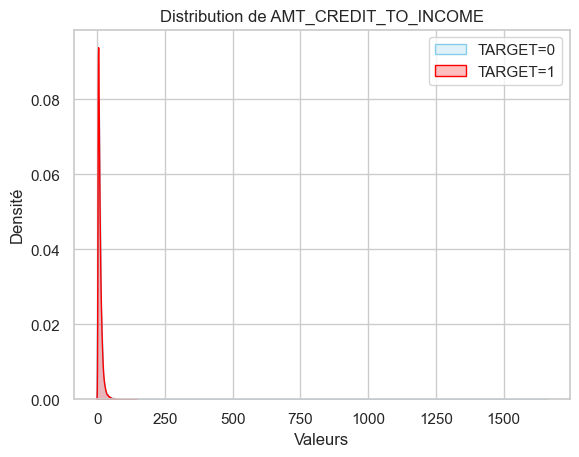

In [95]:
# Plot des distributions kernel pour TARGET==0 et TARGET==1
sns.kdeplot(data.loc[data["TARGET"]==0, "AMT_CREDIT_TO_INCOME"], color='skyblue', label='TARGET=0', fill=True)
sns.kdeplot(data.loc[data["TARGET"]==1, "AMT_CREDIT_TO_INCOME"], color='red', label='TARGET=1', fill=True)

plt.title("Distribution de AMT_CREDIT_TO_INCOME")
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.legend()
plt.show()


In [96]:
median_imputer=SimpleImputer(strategy="median").set_output(transform="pandas")
data["AMT_GOODS_PRICE"]=median_imputer.fit_transform(data["AMT_GOODS_PRICE"].to_numpy().reshape(-1,1))

In [97]:
data["AMT_GOODS_PRICE"].isna().mean()

0.0

In [98]:
data["AMT_GOODS_PRICE"].describe()

count    2.677430e+05
mean     5.386366e+05
std      3.698467e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [99]:
data["AMT_CREDIT_NORM"]=data["AMT_CREDIT"]/data["AMT_GOODS_PRICE"]
data["AMT_ANNUITY"]=(data["AMT_ANNUITY"]+data["CB_AMT_ANNUITY"])/data["AMT_INCOME_TOTAL"]
data["AMT_INCOME_TOTAL_NORM"]=data["AMT_INCOME_TOTAL"]/data["AMT_GOODS_PRICE"]

In [102]:
data["BORROWER_AGE"]=data["DAYS_BIRTH"].apply(np.abs)//365
data["BORROWER_SENIORITY"]=data["DAYS_EMPLOYED"].apply(np.abs)//365
data["BORROWER_FIDELITY"]=data["DAYS_REGISTRATION"].apply(np.abs)//365

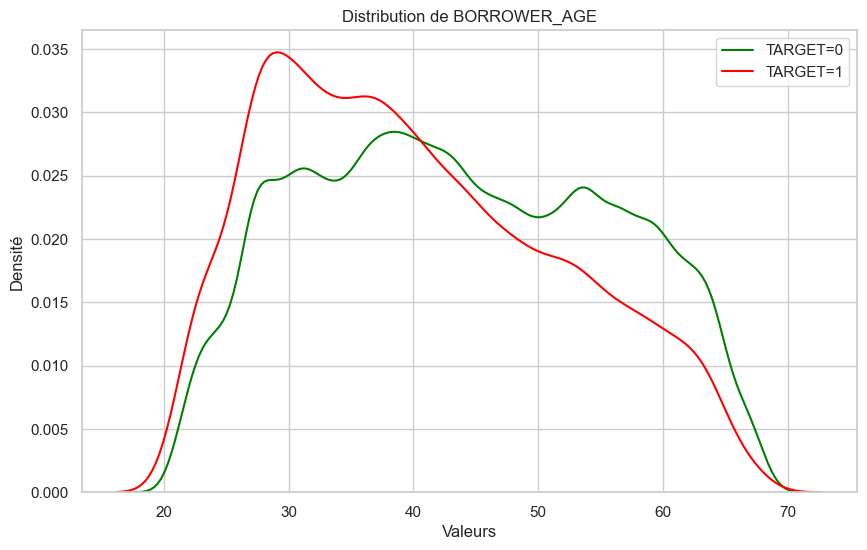

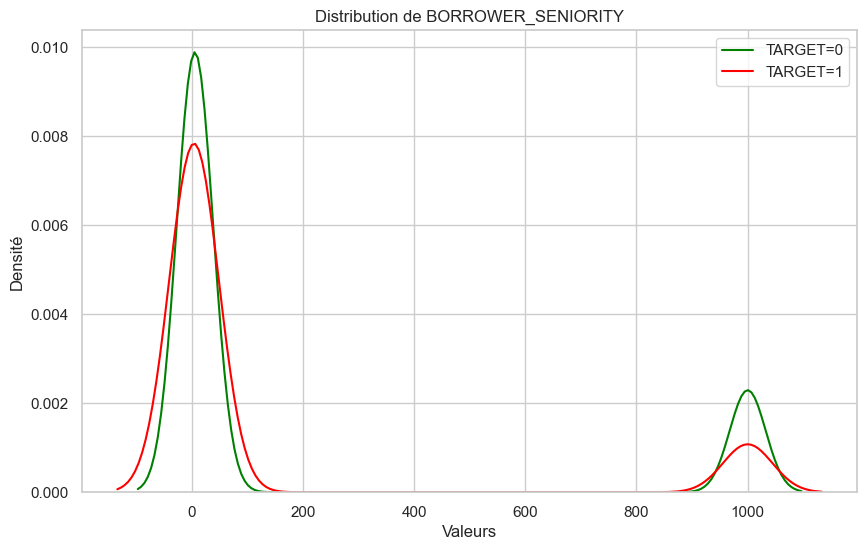

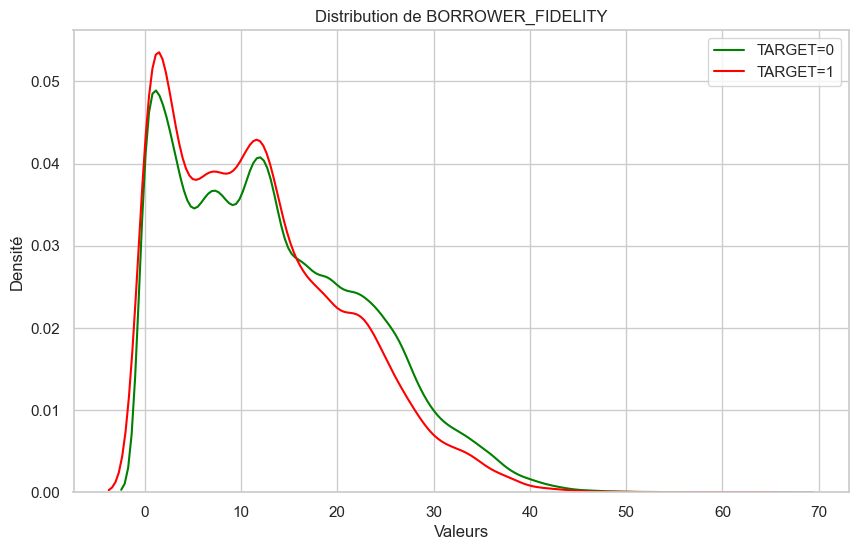

In [200]:
for col in ["BORROWER_AGE","BORROWER_SENIORITY","BORROWER_FIDELITY"]:
    plt.figure(figsize=(10, 6))
    # Plot des distributions kernel pour TARGET==0 et TARGET==1
    sns.kdeplot(data.loc[data["TARGET"]==0, col], color='green', label='TARGET=0', fill=False)
    sns.kdeplot(data.loc[data["TARGET"]==1, col], color='red', label='TARGET=1', fill=False)

    plt.title(f"Distribution de {col}")
    plt.xlabel('Valeurs')
    plt.ylabel('Densité')
    plt.legend()
    plt.show()

In [104]:
data["BORROWER_SENIORITY"].quantile(q=0.8)

25.0

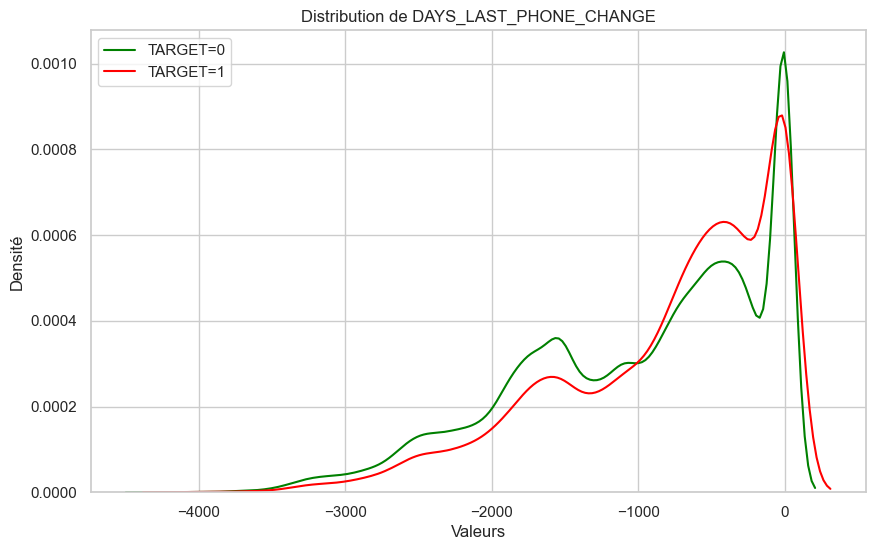

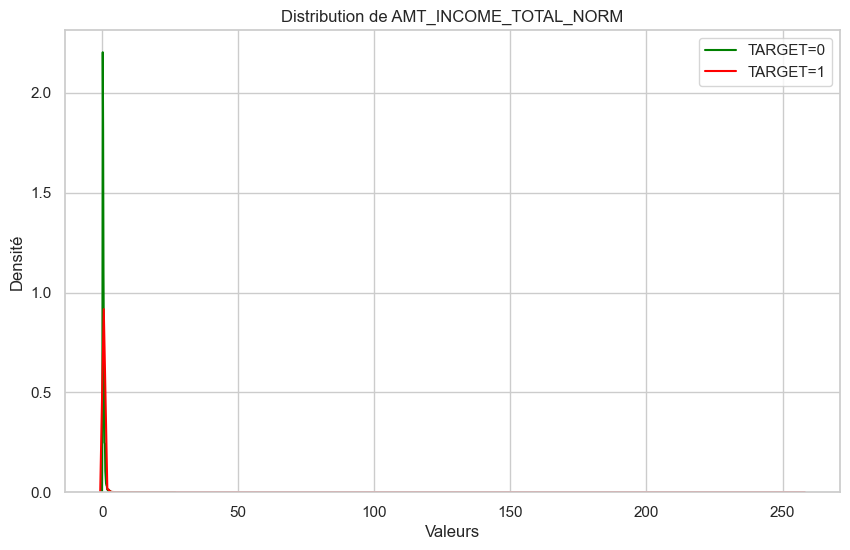

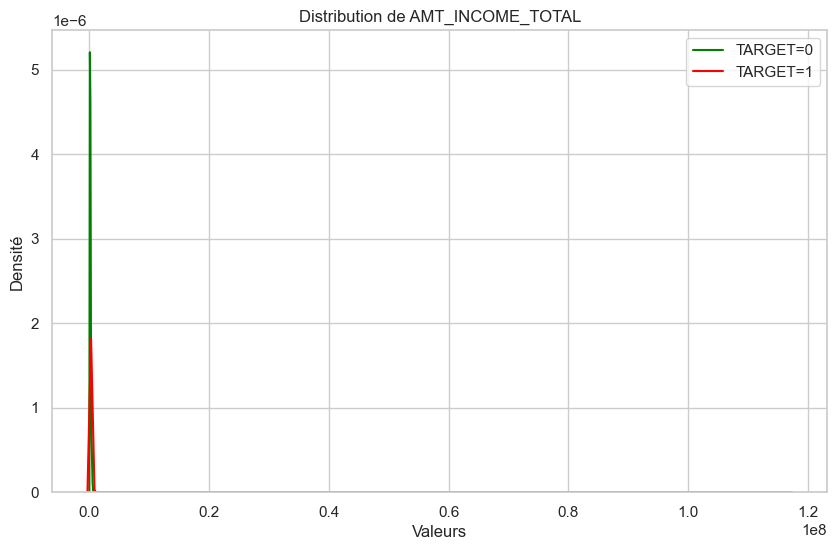

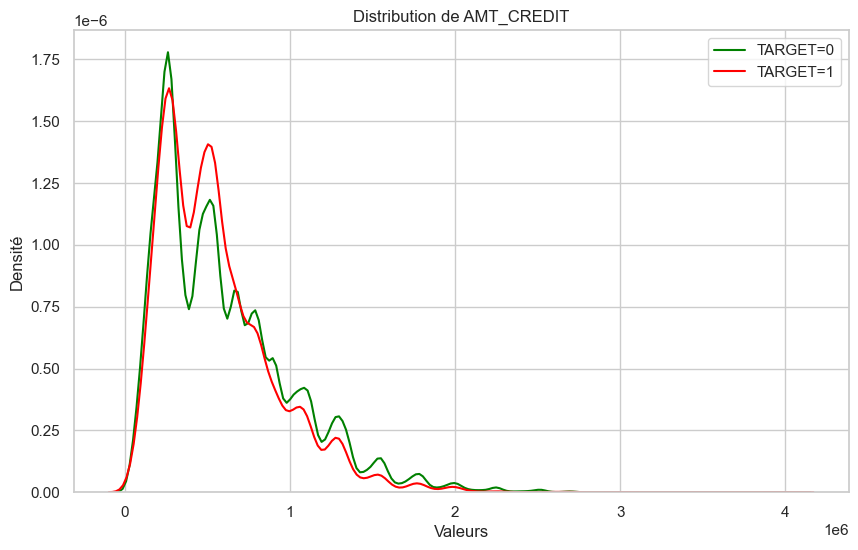

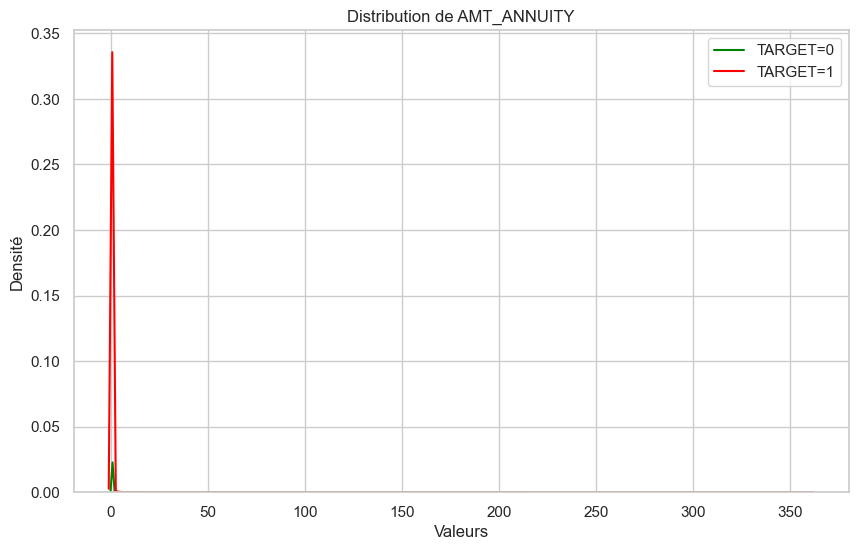

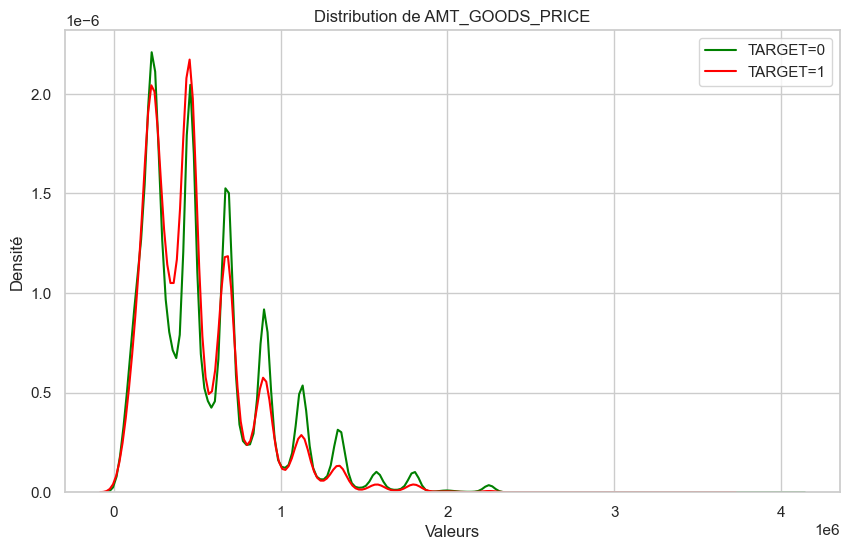

In [198]:
for col in ["DAYS_LAST_PHONE_CHANGE","AMT_INCOME_TOTAL_NORM", "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]:
    plt.figure(figsize=(10, 6))
    # Plot des distributions kernel pour TARGET==0 et TARGET==1
    sns.kdeplot(data.loc[data["TARGET"]==0, col], color='green', label='TARGET=0', fill=False)
    sns.kdeplot(data.loc[data["TARGET"]==1, col], color='red', label='TARGET=1', fill=False)

    plt.title(f"Distribution de {col}")
    plt.xlabel('Valeurs')
    plt.ylabel('Densité')
    plt.legend()
    plt.show()

#### Test de rang des variables numériques ? 

In [106]:
numerical_vars=[var for var in numerical_vars if (var not in binary_vars)& (var not in low_category_categorical_vars)]

In [107]:
numerical_vars

['SK_ID_CURR',
 'TARGET',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YE

In [108]:
data["CNT_FAM_MEMBERS"].value_counts(normalize=True)

CNT_FAM_MEMBERS
2.0     0.514516
1.0     0.220851
3.0     0.171423
4.0     0.080208
5.0     0.011242
6.0     0.001352
7.0     0.000273
8.0     0.000067
9.0     0.000022
10.0    0.000011
12.0    0.000007
20.0    0.000007
14.0    0.000004
11.0    0.000004
15.0    0.000004
16.0    0.000004
13.0    0.000004
Name: proportion, dtype: float64

In [109]:
data[['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count               231654.000000              231654.000000               231654.000000              231654.000000              231654.000000               231654.000000
mean                     0.006436                   0.006915                    0.034120                   0.267731                   0.265832                    1.901301
std                      0.084073                   0.109013                    0.203278                   0.917531                   0.817605                    1.870203
min                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
25%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
50%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    1.000000
75%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    3.000000
max                      4.000000                   9.000000                    8.000000                  27.000000                 261.000000                   25.000000

In [110]:
tested_numerical_variables=[
    "BORROWER_AGE","BORROWER_SENIORITY","BORROWER_FIDELITY","AMT_INCOME_TOTAL_NORM",
    "AMT_CREDIT_NORM", "AMT_INCOME_TOTAL","AMT_CREDIT",
    "AMT_ANNUITY","AMT_GOODS_PRICE",
    'CB_AMT_CREDIT_SUM_DEBT', 'CB_NB_CREDIT_ACTIVE', 'CB_NB_CREDIT_CLOSED', 'CB_DAYS_CREDIT', 'CB_DAYS_CREDIT_ENDDATE', 'CB_AMT_CREDIT_SUM', 'CB_AMT_ANNUITY'
] 

In [111]:
for col in tested_numerical_variables:
    mannwhitney_test(data,col,"TARGET")

Variable: BORROWER_AGE
Mann-Whitney U-statistic: 2954132043.5
P-value: 0.0
Variable: BORROWER_SENIORITY
Mann-Whitney U-statistic: 2991753203.5
P-value: 0.0
Variable: BORROWER_FIDELITY
Mann-Whitney U-statistic: 2743559537.0
P-value: 1.737725932676347e-91
Variable: AMT_INCOME_TOTAL_NORM
Mann-Whitney U-statistic: 2455781669.0
P-value: 9.01718749539708e-12
Variable: AMT_CREDIT_NORM
Mann-Whitney U-statistic: 2180484591.5
P-value: 5.894339417411401e-246
Variable: AMT_INCOME_TOTAL
Mann-Whitney U-statistic: 2624273764.0
P-value: 1.2620198835458554e-19
Variable: AMT_CREDIT
Mann-Whitney U-statistic: 2623630565.5
P-value: 2.653329523205753e-19
Variable: AMT_ANNUITY
Mann-Whitney U-statistic: 2404401043.5
P-value: 2.3454221871624936e-31
Variable: AMT_GOODS_PRICE
Mann-Whitney U-statistic: 2698233302.0
P-value: 9.047020127067678e-58
Variable: CB_AMT_CREDIT_SUM_DEBT
Mann-Whitney U-statistic: 2384496468.0
P-value: 2.5057248988052943e-44
Variable: CB_NB_CREDIT_ACTIVE
Mann-Whitney U-statistic: 2381106690

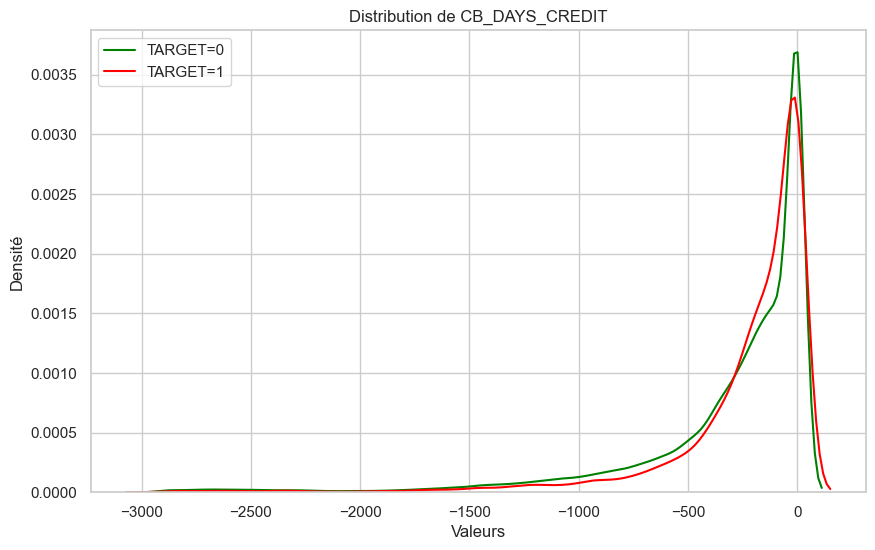

In [296]:
col="CB_DAYS_CREDIT"
plt.figure(figsize=(10, 6))
# Plot des distributions kernel pour TARGET==0 et TARGET==1
sns.kdeplot(data.loc[data["TARGET"]==0, col], color='green', label='TARGET=0', fill=False)
sns.kdeplot(data.loc[data["TARGET"]==1, col], color='red', label='TARGET=1', fill=False)

plt.title(f"Distribution de {col}")
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.legend()
plt.show()

In [112]:
# tested_numerical_variables.remove("AMT_ANNUITY")

In [113]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

class DecisionTreeDiscretizer:
    def __init__(self, max_bins=5, target=None):
        self.tree_max_bins = max_bins
        self.clf = DecisionTreeClassifier(criterion="gini", max_depth=int(round(self.tree_max_bins/2)),
                                          min_samples_split=0.05,
                                           min_samples_leaf=0.05) #
        self.target = target

    def fit(self, X_train):
        # Entraîner le modèle sur les données d'entraînement
        self.clf.fit(X_train.values.reshape(-1, 1), self.target)

    def _get_tree_thresholds(self):
        thresholds = set()
        for node in range(self.clf.tree_.node_count):
            if self.clf.tree_.children_left[node] != self.clf.tree_.children_right[node]:  # non-leaf node
                feature = self.clf.tree_.feature[node]
                threshold = self.clf.tree_.threshold[node]
                thresholds.add(threshold)
        return np.array(list(thresholds))

    def get_thresholds(self):
        if hasattr(self.clf, 'tree_') and self.clf.tree_ is not None:
            thresholds_np = self._get_tree_thresholds()
            thresholds = [-np.inf] + sorted(list(set(list(thresholds_np)))) + [np.inf]
            return thresholds
        else:
            raise ValueError("Le classifieur n'est pas entraîné. Utilisez la méthode fit avant d'obtenir les seuils.")

    def transform(self, X):
        # Vérifier si le modèle est entraîné
        if not hasattr(self.clf, 'tree_') or self.clf.tree_ is None:
            raise ValueError("Le classifieur n'est pas entraîné. Utilisez la méthode fit avant de transformer les données de test.")

        thresholds = self.get_thresholds()

        # Utiliser pd.cut pour obtenir les intervalles au lieu des numéros
        intervals = pd.cut(X.values.flatten(), bins=thresholds, include_lowest=True, right=True)
        return intervals



In [114]:
data["AMT_GOODS_PRICE"].isna().mean()

0.0

In [115]:
data["AMT_CREDIT_NORM"].isna().mean()

0.0

In [116]:
data[binary_vars+low_category_categorical_vars]=data[binary_vars+low_category_categorical_vars].astype("category")

In [117]:
for col in binary_vars:
    print(f"{col} IV {calculate_information_value_from_contingency_table(pd.crosstab(data['TARGET'], data[col]))}")
    print( 60*"*")

FLAG_EMP_PHONE IV 0.033181865985082055
************************************************************
FLAG_WORK_PHONE IV 0.010020739108068197
************************************************************
FLAG_PHONE IV 0.008439376718770545
************************************************************
REG_CITY_NOT_LIVE_CITY IV 0.023982694861059903
************************************************************
REG_CITY_NOT_WORK_CITY IV 0.03192868018476106
************************************************************
LIVE_CITY_NOT_WORK_CITY IV 0.012107467862934172
************************************************************


In [118]:
for col in low_category_categorical_vars:
    print(f"{col} IV {calculate_information_value_from_contingency_table(pd.crosstab(data['TARGET'], data[col]))}")
    print( 60*"*")

NAME_CONTRACT_TYPE IV 0.015352413616143928
************************************************************
CODE_GENDER IV 0.03856486670125812
************************************************************
FLAG_OWN_CAR IV 0.006133537149036929
************************************************************
HAS_CHILDREN IV 0.005162780197537978
************************************************************
REGION_RATING_CLIENT IV 0.04803983024358356
************************************************************
REGION_RATING_CLIENT_W_CITY IV 0.05105479461447414
************************************************************


In [119]:
def group_days_credit(days):
    if (np.abs(days) < 365) :
        return "< 1 YEAR"
    elif (np.abs(days) >= 365) & (np.abs(days) <365*2):
        return "BETWEEN 1-2 YEAR"
    elif (np.abs(days) >= 365*2) :
        return "MORE THAN 2 YEARs"
    

In [120]:
def group_number_credit(nb):
    if nb <=2 :
        return "2 OR LESS"
    elif (nb > 2) & (nb <=4):
        return "3 OR 4"
    else:
        return "5 OR MORE"

In [121]:
# data["CB_NB_CREDIT_ACTIVE"]=data["CB_NB_CREDIT_ACTIVE"].apply(group_number_credit)

In [122]:
# data["CB_NB_CREDIT_ACTIVE"].value_counts()

In [123]:
# data["CB_DAYS_CREDIT"]=data["CB_DAYS_CREDIT"].apply(group_days_credit)

In [124]:
# data["CB_NB_ACTIVE_CREDIT_DAYS_LAST"]=data["CB_NB_CREDIT_ACTIVE"] + "-" + data["CB_DAYS_CREDIT"]

In [125]:
# show_risk_stability_overtime(data,"CB_DAYS_CREDIT")

In [201]:
# calculate_information_value_from_contingency_table(pd.crosstab(data["TARGET"],data["CB_DAYS_CREDIT"]))

0

In [220]:
import statsmodels.api as sm
data_train, data_test=train_test_split(data, test_size=0.3, stratify=data["TARGET"], random_state=42)

In [221]:
discretised_cols=["AMT_INCOME_TOTAL_NORM", "AMT_CREDIT_TO_INCOME" , "BORROWER_AGE", "BORROWER_SENIORITY",
                  "BORROWER_FIDELITY", "AMT_CREDIT_NORM", "DAYS_LAST_PHONE_CHANGE"
                  ]
discretised_cols_2=["AMT_ANNUITY","AMT_GOODS_PRICE", "CB_DAYS_CREDIT",
                  'CB_AMT_CREDIT_SUM_DEBT', 'CB_NB_CREDIT_CLOSED', 
                  'CB_DAYS_CREDIT_ENDDATE', 'CB_AMT_CREDIT_SUM', 'CB_AMT_ANNUITY'
]

In [222]:
dt_discretizer=DecisionTreeDiscretizer(target=data_train["TARGET"])

for col in discretised_cols:
    dt_discretizer.fit(data_train[col])
    data_train[col]=dt_discretizer.transform(data_train[col])
    data_test[col]=dt_discretizer.transform(data_test[col])

In [223]:
calculate_information_value_from_contingency_table(pd.crosstab(data_train["TARGET"], data_train["DAYS_LAST_PHONE_CHANGE"]))

0.047587970361022074

In [224]:
dt_discretizer=DecisionTreeDiscretizer(target=data_train["TARGET"])

for col in discretised_cols_2:
    dt_discretizer.fit(data_train[col])
    data_train[col]=dt_discretizer.transform(data_train[col])
    data_test[col]=dt_discretizer.transform(data_test[col])

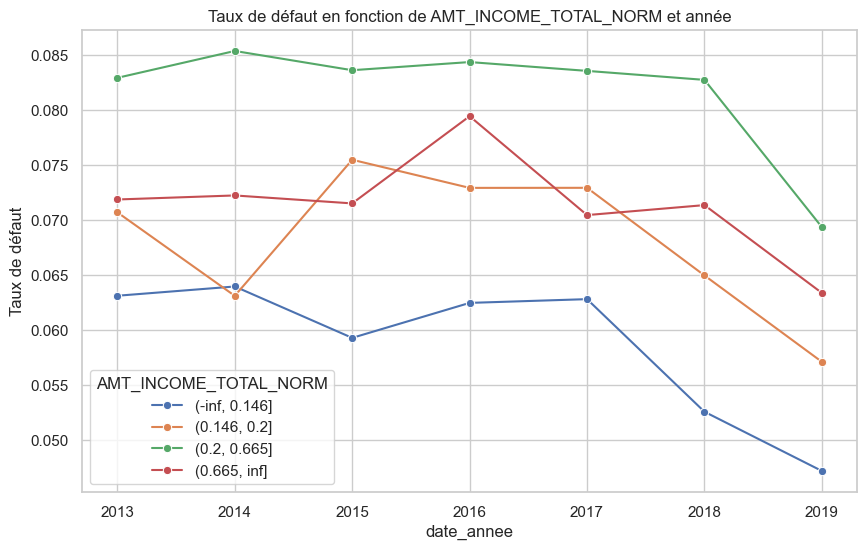

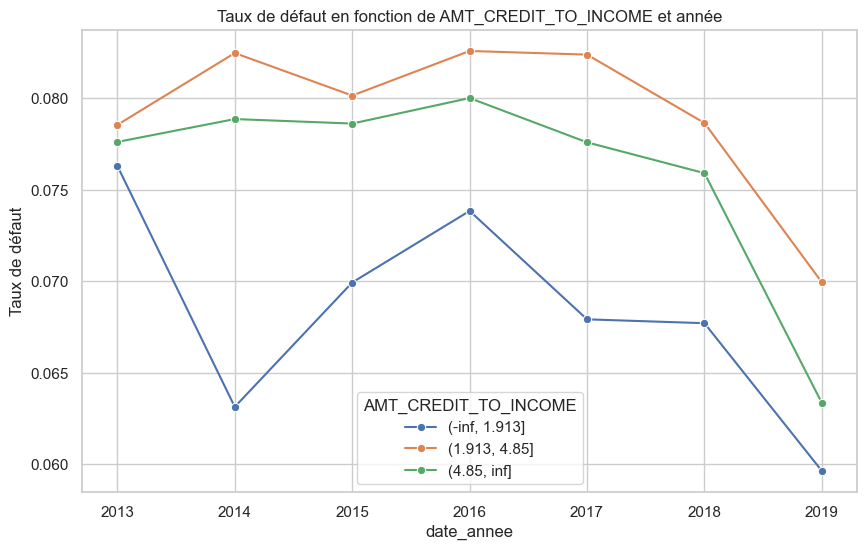

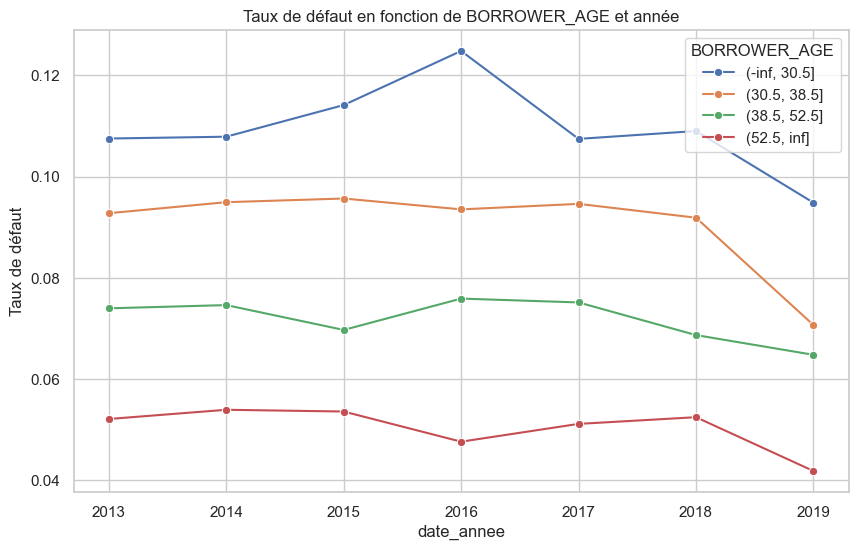

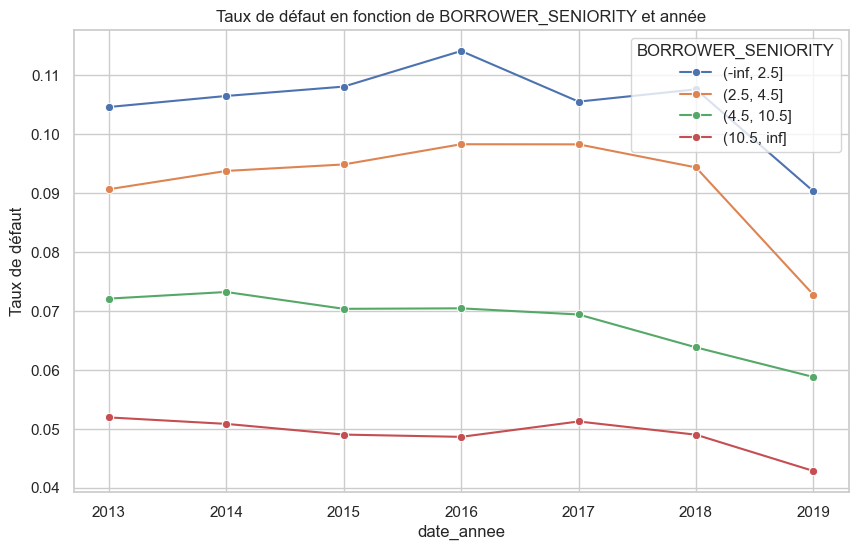

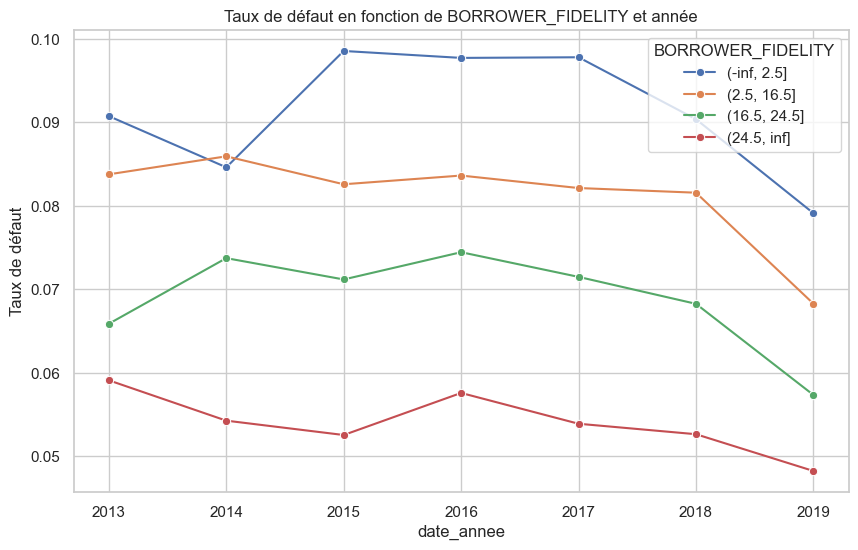

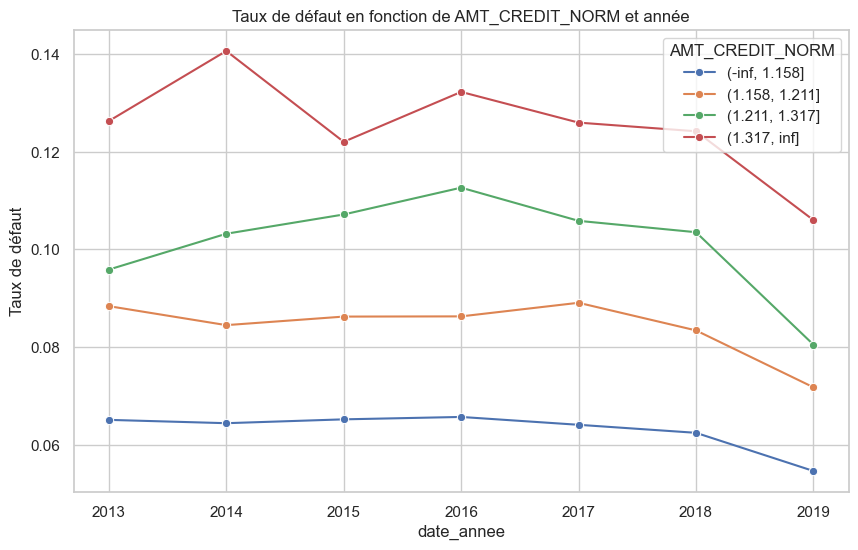

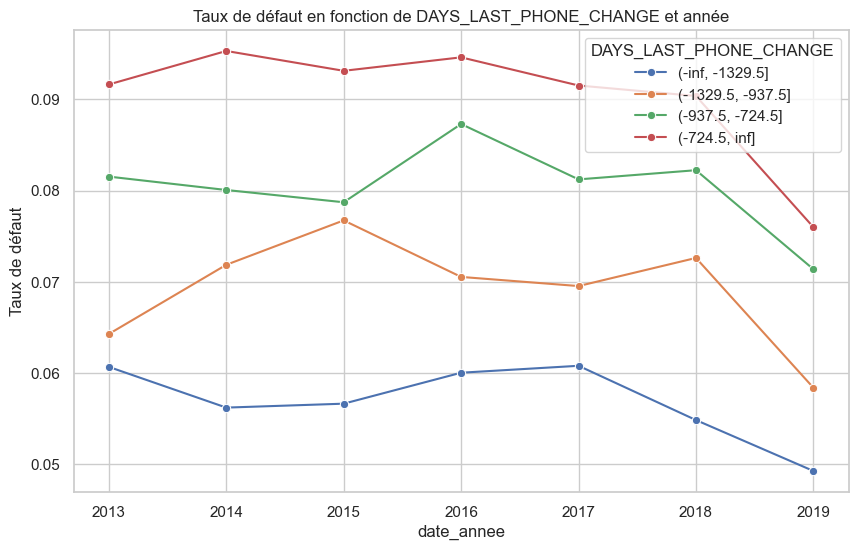

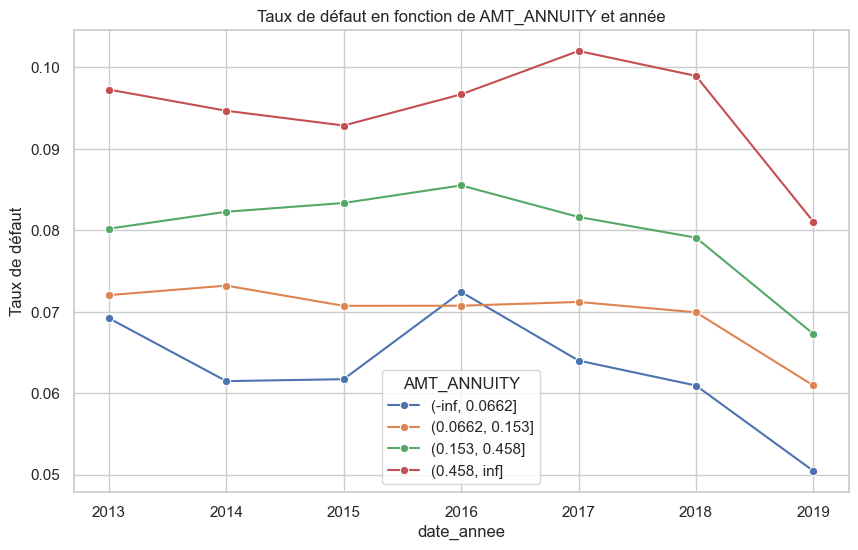

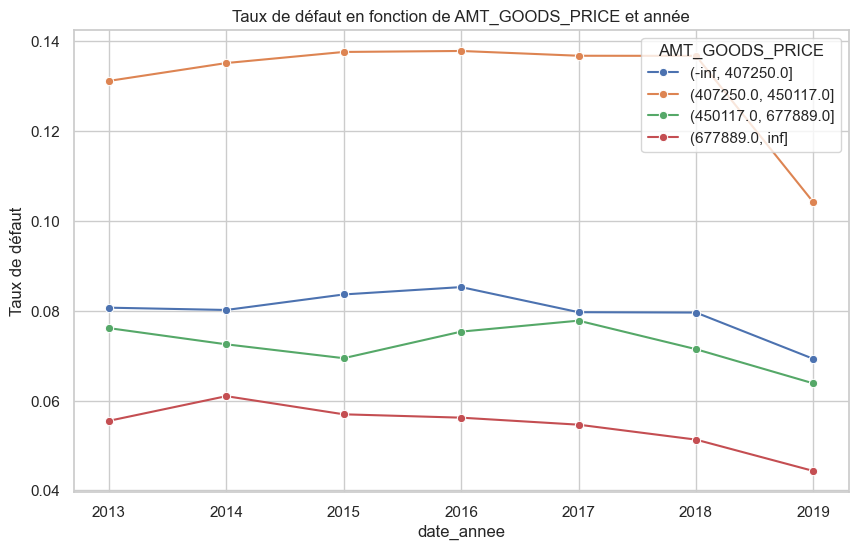

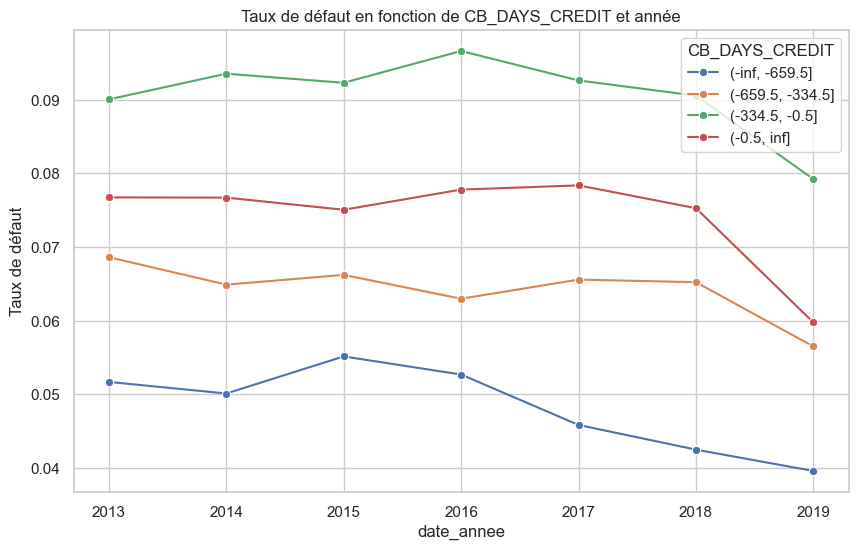

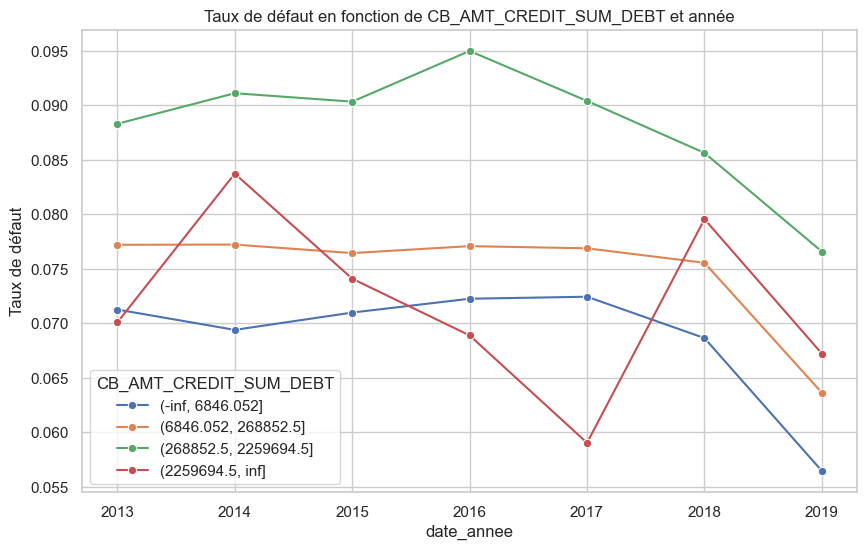

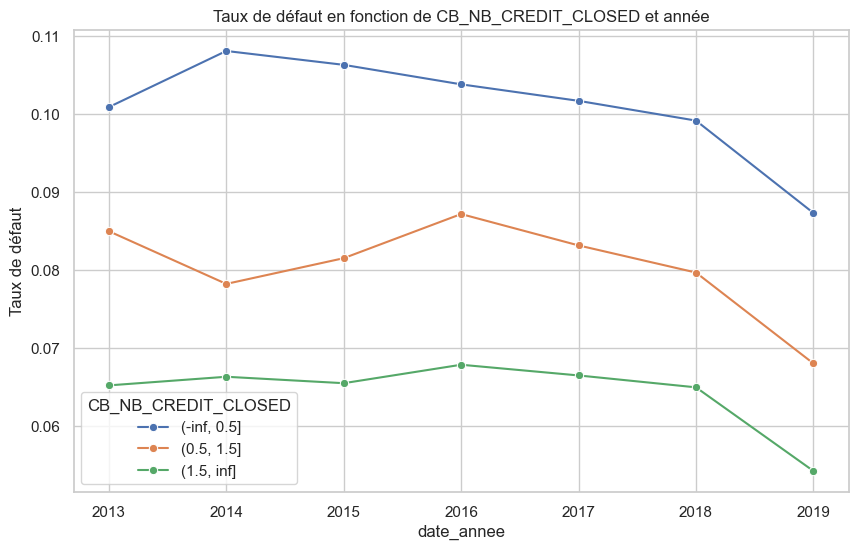

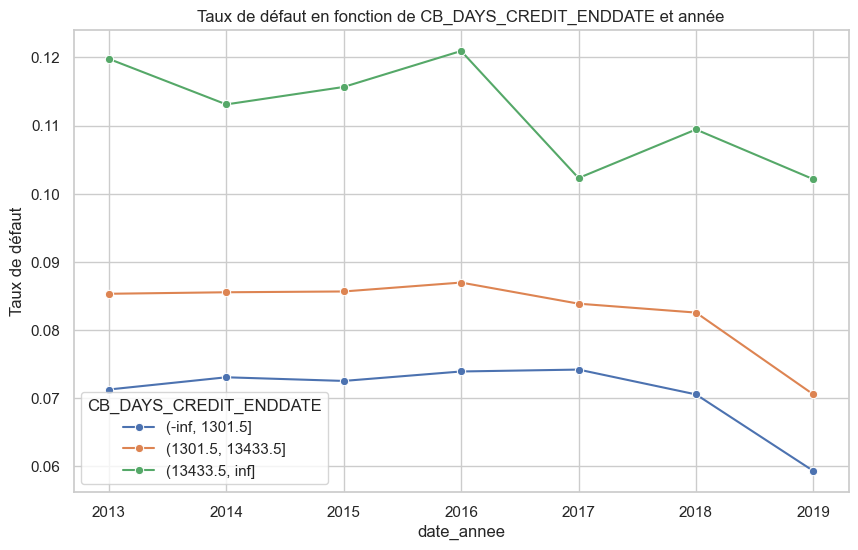

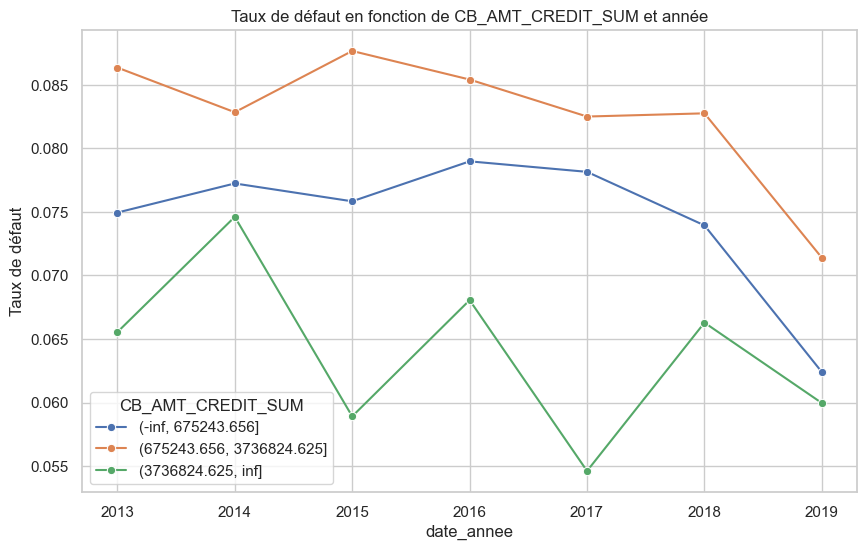

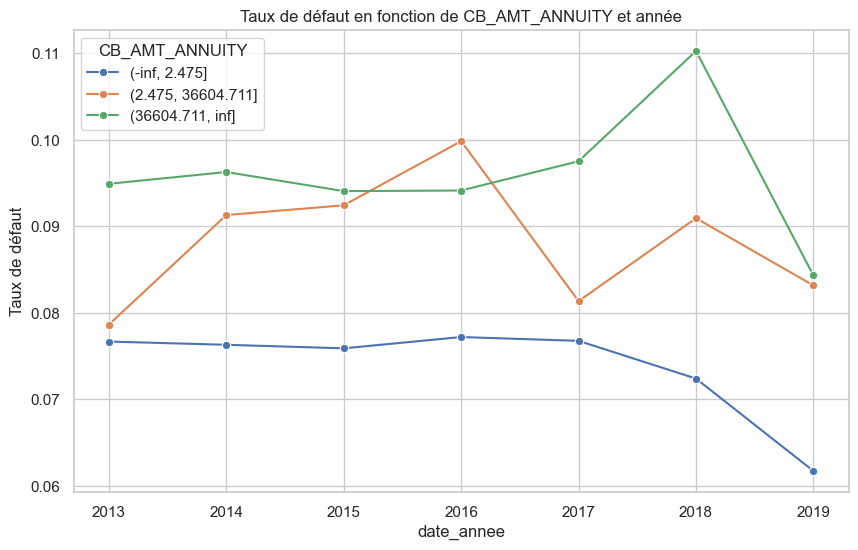

In [225]:
for col in discretised_cols+discretised_cols_2:
    show_risk_stability_overtime(data_train,col)

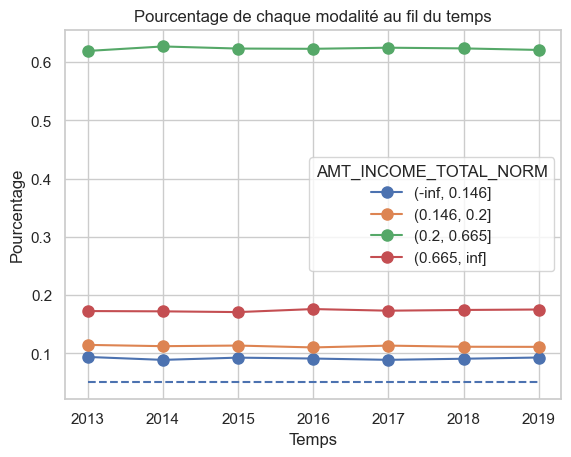

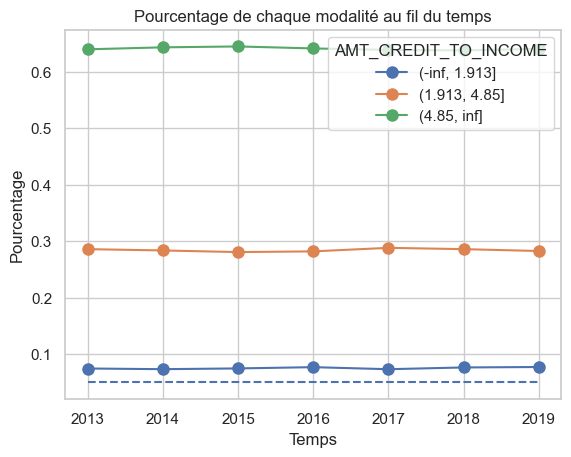

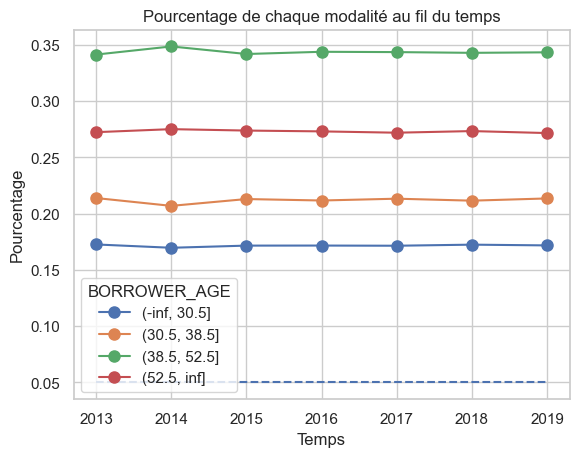

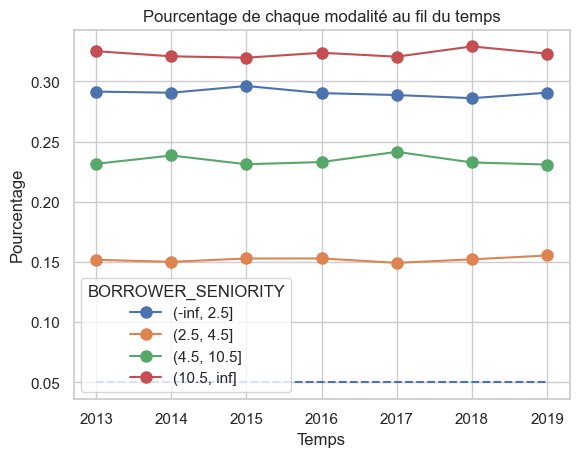

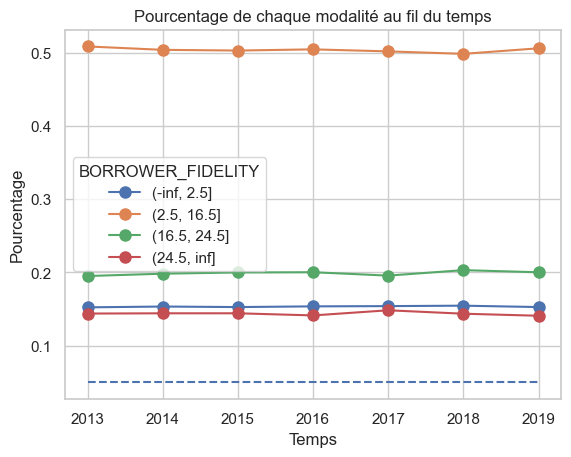

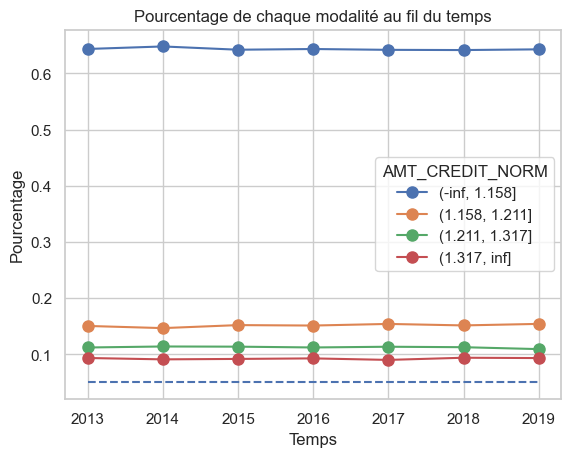

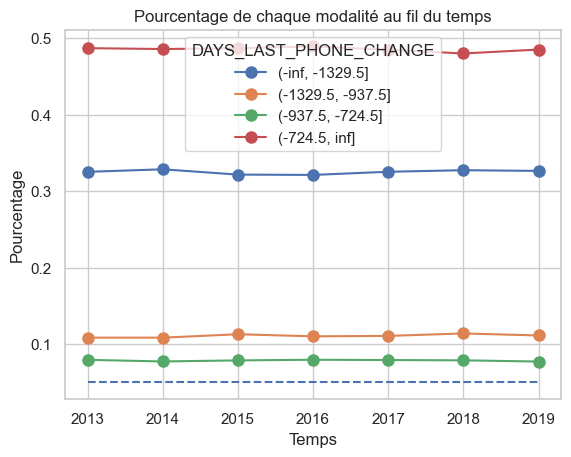

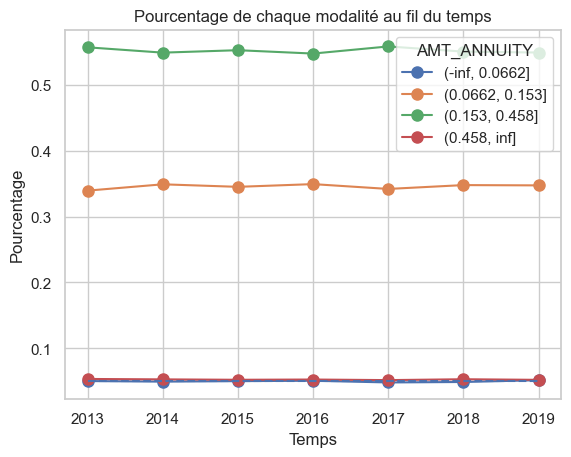

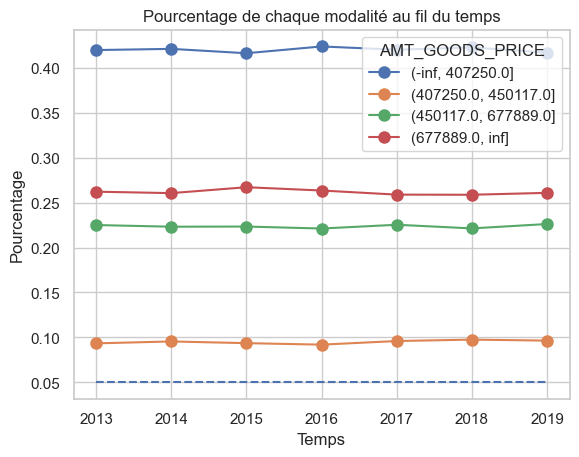

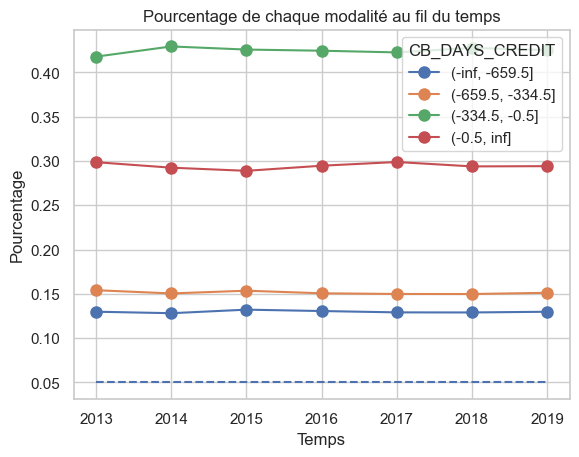

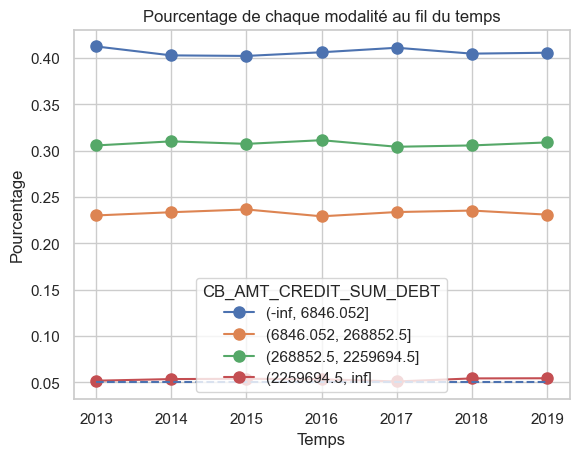

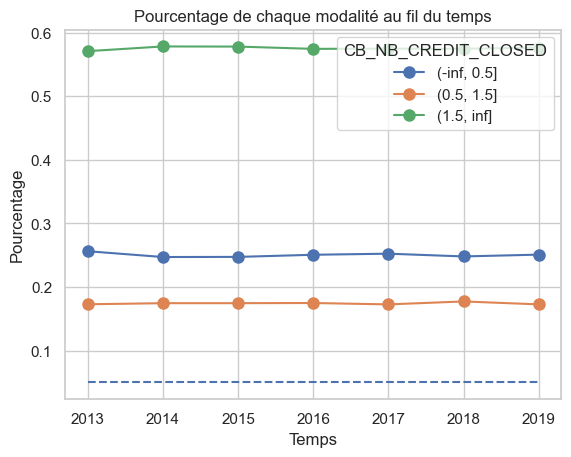

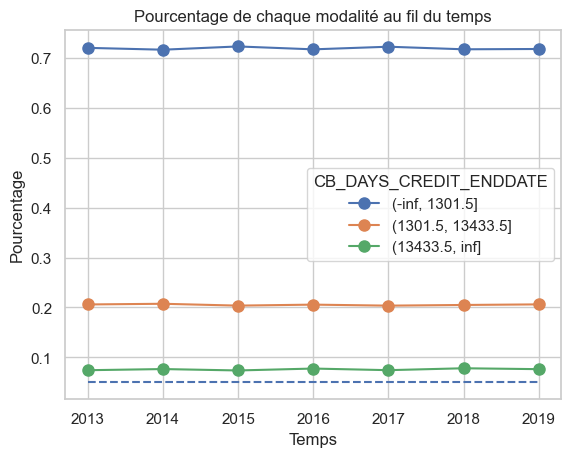

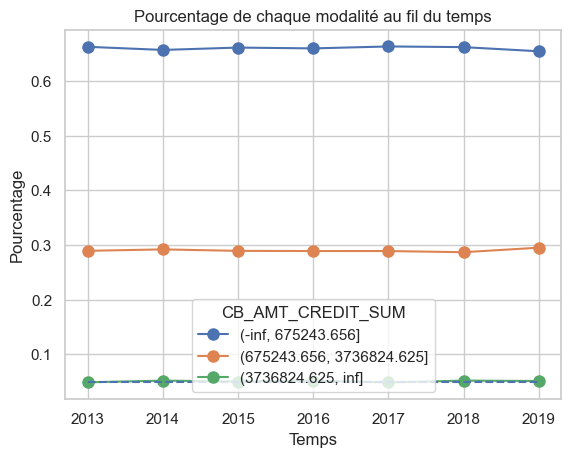

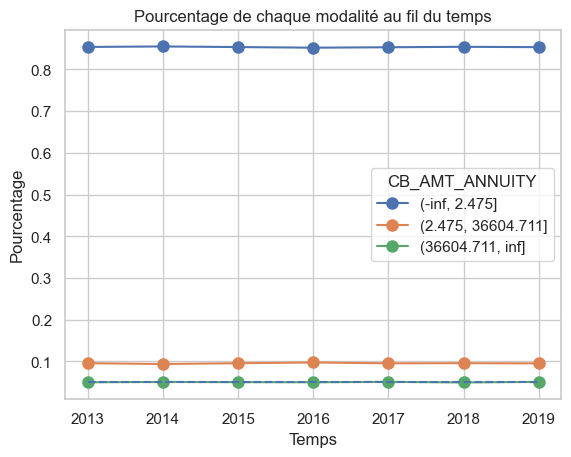

In [226]:
for col in discretised_cols+discretised_cols_2:
    show_volume_stability_overtime(data_train,col)

In [227]:
for col in discretised_cols+discretised_cols_2:
    print(f"{col} : {calculate_information_value_from_contingency_table(pd.crosstab(data_train['TARGET'], data_train[col]))}")
    print(60*"=")

AMT_INCOME_TOTAL_NORM : 0.012315486285737243
AMT_CREDIT_TO_INCOME : 0.0015129258294612914
BORROWER_AGE : 0.08605431027514127
BORROWER_SENIORITY : 0.11079999310797548
BORROWER_FIDELITY : 0.027698699133017705
AMT_CREDIT_NORM : 0.07420474974006244
DAYS_LAST_PHONE_CHANGE : 0.047587970361022074
AMT_ANNUITY : 0.009732283306609298
AMT_GOODS_PRICE : 0.076172308993416
CB_DAYS_CREDIT : 0.046519492572554055
CB_AMT_CREDIT_SUM_DEBT : 0.013345898361145565
CB_NB_CREDIT_CLOSED : 0.0454841416493998
CB_DAYS_CREDIT_ENDDATE : 0.022638499544539968
CB_AMT_CREDIT_SUM : 0.004339093330230161
CB_AMT_ANNUITY : 0.007127769300108829


In [134]:
cramers_v(pd.crosstab(data["BORROWER_AGE"], data["BORROWER_SENIORITY"]))

0.12729479238041272

In [228]:
data_train[["AMT_CREDIT_NORM" , "BORROWER_AGE" , "BORROWER_FIDELITY" , "FLAG_OWN_CAR"]].isna().mean()

AMT_CREDIT_NORM      0.0
BORROWER_AGE         0.0
BORROWER_FIDELITY    0.0
FLAG_OWN_CAR         0.0
dtype: float64

In [229]:
data_train[["REGION_RATING_CLIENT_W_CITY","FAM_STATS_CHILD", "NAME_EDUCATION_TYPE", "NAME_CONTRACT_TYPE", "AMT_CREDIT_NORM" , "BORROWER_AGE" , "BORROWER_FIDELITY" , "BORROWER_SENIORITY","DAYS_LAST_PHONE_CHANGE"]].isna().mean()

REGION_RATING_CLIENT_W_CITY    0.0
FAM_STATS_CHILD                0.0
NAME_EDUCATION_TYPE            0.0
NAME_CONTRACT_TYPE             0.0
AMT_CREDIT_NORM                0.0
BORROWER_AGE                   0.0
BORROWER_FIDELITY              0.0
BORROWER_SENIORITY             0.0
DAYS_LAST_PHONE_CHANGE         0.0
dtype: float64

In [240]:
formula="TARGET ~ C(OCCUPATION_TYPE,Treatment(reference=0)) + C(NAME_EDUCATION_TYPE,Treatment(reference='Non graduated'))  + C(AMT_CREDIT_NORM,Treatment(reference=3)) + C(BORROWER_AGE,Treatment(reference=0)) + C(BORROWER_SENIORITY,Treatment(reference=0)) + C(CB_NB_CREDIT_CLOSED, Treatment(reference=0))+ C(CB_DAYS_CREDIT,Treatment(reference=2)) - 1" # + C(DAYS_LAST_PHONE_CHANGE, Treatment(reference=3)) + C(FAM_STATS_CHILD,Treatment(reference='Single')) + +BORROWER_FIDELITY 
# à spécifier les modalités de références pour avoir 

In [241]:
model_logit=sm.Logit.from_formula(formula=formula,data=data_train).fit()

Optimization terminated successfully.
         Current function value: 0.257694
         Iterations 7


In [242]:
print(model_logit.summary())

                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               187420
Model:                          Logit   Df Residuals:                   187401
Method:                           MLE   Df Model:                           18
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                 0.04490
Time:                        14:48:35   Log-Likelihood:                -48297.
converged:                       True   LL-Null:                       -50568.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
C(OCCUPATION_TYPE, Treatment(reference=0))[0]               

In [243]:
y_train_proba=model_logit.predict(data_train)
gini=2*roc_auc_score(data_train["TARGET"],y_train_proba) - 1
print(f"{gini = :.3f}")

gini = 0.329


In [244]:
y_test_proba=model_logit.predict(data_test)
gini=2*roc_auc_score(data_test["TARGET"],y_test_proba) - 1
print(f"{gini = :.3f}")

gini = 0.320


#### Construction de la grille de score

In [245]:
def grid_score(results_model_logit, variables_utilisees) -> pd.DataFrame:
    index_logit = list(results_model_logit.params.index)

    variables_logit = []
    modalites_variables = []

    # récupérer les variables
    for ligne in index_logit :
        variable = ligne.split(",")[0].replace("C(","")
        variables_logit.append(variable)

        modalite = ligne.split("[")[-1].replace("]","")
        if "T.Interval" in modalite :
            modalite = modalite.replace("T.Interval","")
        if ", closed='right'" in modalite :
            modalite = modalite.replace(", closed='right')", "]")
        if "T." in modalite :
            modalite = modalite.replace("T.","")
        modalites_variables.append(modalite)


    df_coef = pd.DataFrame({'Variable': variables_logit, 'Modalités': modalites_variables, 'Coefficient' : list(model_logit.params), 'p-value' : list(model_logit.pvalues)})

    # variables_utilisees = ["OCCUPATION_TYPE", "NAME_EDUCATION_TYPE"  , "AMT_CREDIT_NORM" , "BORROWER_AGE" , "BORROWER_SENIORITY" , "CB_NB_CREDIT_CLOSED", "CB_DAYS_CREDIT"]
    grid = {'Variable':[],'Modalités':[],'effectif':[],}

    for var in variables_utilisees:
        for modalite in data_train[var].value_counts().reset_index()[var].unique():
            grid['Variable'].append(var)
            grid['Modalités'].append(modalite)
            effectif_pct = data_train[var].value_counts(normalize=True)[modalite] * 100
            grid['effectif'].append(effectif_pct)
    grid=pd.DataFrame(grid)
    grid['Modalités'] =grid['Modalités'].apply(str) #màj ici
    grid['Coefficient']=0

    grid_df=pd.merge(grid.drop(columns='Coefficient'),df_coef, on=['Variable', 'Modalités'], how='outer')
    grid_df=grid_df.pivot_table(index=['Variable', 'Modalités'], values=['effectif', 'Coefficient', 'p-value'], aggfunc='sum')
    grid_df=grid_df.reset_index()
    grid_df['Modalités'] =grid_df['Modalités'].apply(str)

    grid_df = grid_df.drop_duplicates(subset=['Variable','Modalités'],keep='last').reset_index(drop=True)

    notes = []
    sum_diff = sum([coefficients.max() - coefficients.min() for variable, coefficients in grid_df.groupby('Variable')['Coefficient']])


    #chaque ligne du DataFrame
    for index, row in grid_df.iterrows():
        # Extraire la variable correspondante à la modalité
        variable = row['Variable']
        
        coefficients_variable = grid_df.loc[grid_df['Variable'] == variable, 'Coefficient']
        note = round(1000 * ((coefficients_variable.max() - row['Coefficient']) / sum_diff))
        notes.append(note)


    grid_df['Note'] = notes

    for var in grid_df['Variable'].unique():
        for modal in grid_df[grid_df['Variable'] == var]['Modalités'].unique():
            tmp = data_train[var].value_counts(normalize=True)
            proportion = tmp[tmp.index.astype(str) == modal].iloc[0]* 100
            grid_df.loc[(grid_df['Variable'] == var) & (grid_df['Modalités'] == modal), 'effectif'] = proportion

    
    contributions = []

    for index, row in grid_df.iterrows():
        variable = row['Variable']
        

        coefficients_variable = grid_df.loc[grid_df['Variable'] == variable, 'Coefficient']
        mean_note = grid_df.loc[grid_df['Variable'] == variable, 'Note'].mean()
        
        #formule
        numerator = np.sqrt(np.sum([(row['effectif'] * (row['Note'] - mean_note)**2) for _, row in grid_df.loc[grid_df['Variable'] == variable].iterrows()]))
        denominator = np.sum([np.sqrt(np.sum([(row['effectif'] * (row['Note'] - mean_note)**2) for _, row in grid_df.loc[grid_df['Variable'] == var].iterrows()])) for var in grid_df['Variable'].unique()])
        
        contribution = numerator / denominator
        contributions.append(contribution)


    grid_df['Contribution'] = contributions

    tx_df = {'Variable':[],'Modalités':[],'tx_defaut':[]}
    for var in grid_df['Variable'].unique():
        for modalite in grid_df[grid_df['Variable']==var]['Modalités'].unique():

            defauts = data_train[data_train[var].apply(str)==modalite]['TARGET'].sum()
            tout_lemonde =  data_train[data_train[var].apply(str)==modalite]['TARGET'].shape[0]
            tx_defaut= defauts/tout_lemonde * 100
            tx_df['Variable'].append(var)
            tx_df['Modalités'].append(modalite)
            tx_df['tx_defaut'].append(round(tx_defaut, 2))

    tx_df= pd.DataFrame(tx_df)

    Grille_score = pd.merge(grid_df, tx_df, on=['Variable', 'Modalités'], how='left')

    return Grille_score

In [246]:
liste_variables_utilisees = ["OCCUPATION_TYPE", "NAME_EDUCATION_TYPE"  , "AMT_CREDIT_NORM" , "BORROWER_AGE" , "BORROWER_SENIORITY" , "CB_NB_CREDIT_CLOSED", "CB_DAYS_CREDIT"]
grid_score = grid_score(model_logit, liste_variables_utilisees)
grid_score

Variable         Modalités  Coefficient   effectif        p-value  Note  Contribution  tx_defaut
0       AMT_CREDIT_NORM     (-inf, 1.158]    -0.634318  64.350656  5.892898e-129   170      0.190621       6.31
1       AMT_CREDIT_NORM    (1.158, 1.211]    -0.339120  15.151531   1.542904e-26    91      0.190621       8.42
2       AMT_CREDIT_NORM    (1.211, 1.317]    -0.201812  11.257070   7.680078e-10    54      0.190621      10.14
3       AMT_CREDIT_NORM      (1.317, inf]     0.000000   9.240743   0.000000e+00     0      0.190621      12.53
4          BORROWER_AGE      (-inf, 30.5]     0.000000  17.156654   0.000000e+00     0      0.110458      10.94
5          BORROWER_AGE      (30.5, 38.5]    -0.076845  21.190908   2.896868e-03    21      0.110458       9.06
6          BORROWER_AGE      (38.5, 52.5]    -0.293286  34.354391   5.661051e-32    79      0.110458       7.18
7          BORROWER_AGE       (52.5, inf]    -0.456180  27.298047   1.222027e-44   123      0.110458       5.03
8    BORROWER_SENIORITY       (-inf, 2.5]     0.000000  29.054530   0.000000e+00     0      0.124534      10.52
9    BORROWER_SENIORITY       (10.5, inf]    -0.456625  32.313520   5.445693e-56   123      0.124534       4.90
10   BORROWER_SENIORITY        (2.5, 4.5]    -0.107389  15.211824   1.969206e-05    29      0.124534       9.18
11   BORROWER_SENIORITY       (4.5, 10.5]    -0.339117  23.420126   1.671199e-44    91      0.124534       6.83
12       CB_DAYS_CREDIT       (-0.5, inf]    -0.418702  29.437627   4.154770e-79   112      0.159091       7.43
13       CB_DAYS_CREDIT    (-334.5, -0.5]     0.000000  42.451179   0.000000e+00     0      0.159091       9.07
14       CB_DAYS_CREDIT  (-659.5, -334.5]    -0.356618  15.133390   1.784937e-38    96      0.159091       6.43
15       CB_DAYS_CREDIT    (-inf, -659.5]    -0.635582  12.977804   4.840910e-84   171      0.159091       4.83
16  CB_NB_CREDIT_CLOSED       (-inf, 0.5]     0.000000  25.042685   0.000000e+00     0      0.133474      10.11
17  CB_NB_CREDIT_CLOSED        (0.5, 1.5]    -0.258898  17.426102   7.007153e-23    70      0.133474       8.04
18  CB_NB_CREDIT_CLOSED        (1.5, inf]    -0.458265  57.531213   4.807827e-97   123      0.133474       6.44
19  NAME_EDUCATION_TYPE         Graduated    -0.500468  24.397076   2.942065e-91   134      0.163721       5.00
20  NAME_EDUCATION_TYPE     Non graduated     0.000000  75.602924   0.000000e+00     0      0.163721       8.49
21      OCCUPATION_TYPE                 0    -1.259701   7.115569  1.283291e-132   156      0.094895       5.34
22      OCCUPATION_TYPE                 1    -1.063903  51.521182  8.395320e-189   104      0.094895       6.06
23      OCCUPATION_TYPE                 2    -0.865775  34.206595  1.831526e-138    50      0.094895       9.68
24      OCCUPATION_TYPE                 3    -0.678424   7.156654   1.098501e-57     0      0.094895      11.49

In [295]:
grid_score["Contribution"].unique().sum()

0.9767947873606836

In [196]:
import openpyxl
grid_score.to_excel("../data/grille_de_score.xlsx")

In [253]:
def attribute_score(grid_score, data):
    data['Note'] = 0  
    for var in grid_score["Variable"].unique():
        modal = grid_score[grid_score['Variable'] == var]['Modalités'].unique()
        for i in range(len(modal)):
            condition = data[var].apply(str) == modal[i]  # Condition pour vérifier la modalité
            note = grid_score[(grid_score['Variable'] == var) & (grid_score['Modalités'] == str(modal[i]))]['Note'].values[0]
            data['Note'] = np.where(condition, data['Note'] + note, data['Note'])
    pass

In [254]:
attribute_score(grid_score,data_train)
attribute_score(grid_score,data_test)

In [256]:
data_train.shape

(187420, 117)

In [257]:
data_train["Note"]

536       814
144534    419
175942    166
80236     661
96745     564
         ... 
83042     755
115620    328
100817    386
9260      619
63861     499
Name: Note, Length: 187420, dtype: int64

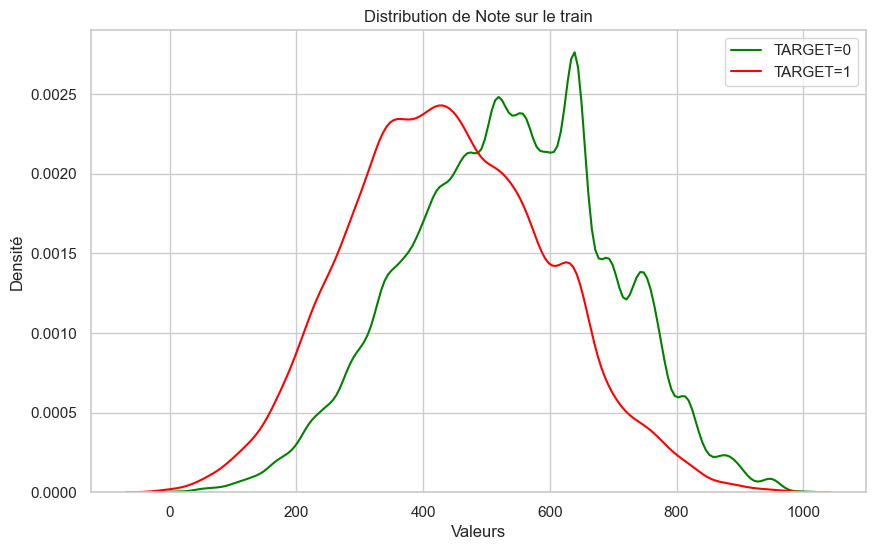

In [258]:
col="Note"
plt.figure(figsize=(10, 6))
# Plot des distributions kernel pour TARGET==0 et TARGET==1
sns.kdeplot(data_train.loc[data_train["TARGET"]==0, col], color='green', label='TARGET=0', fill=False)
sns.kdeplot(data_train.loc[data_train["TARGET"]==1, col], color='red', label='TARGET=1', fill=False)

plt.title(f"Distribution de {col} sur le train")
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.legend()
plt.show()

In [262]:
def show_conditionnal_density(data:pd.DataFrame, colname:str):
    plt.figure(figsize=(10, 6))
    # Plot des distributions kernel pour TARGET==0 et TARGET==1
    sns.kdeplot(data.loc[data["TARGET"]==0, colname], color='green', label='TARGET=0', fill=False)
    sns.kdeplot(data.loc[data["TARGET"]==1, colname], color='red', label='TARGET=1', fill=False)

    plt.title(f"Distribution de {colname} sur le test")
    plt.xlabel(f"{colname}")
    plt.ylabel('Pourcentage')
    plt.legend()
    plt.show()

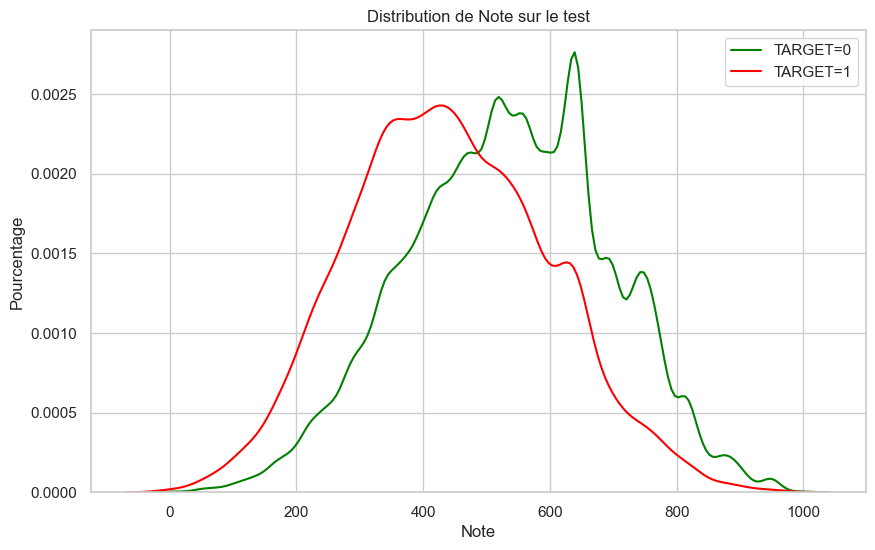

In [263]:
show_conditionnal_density(data_train,"Note")

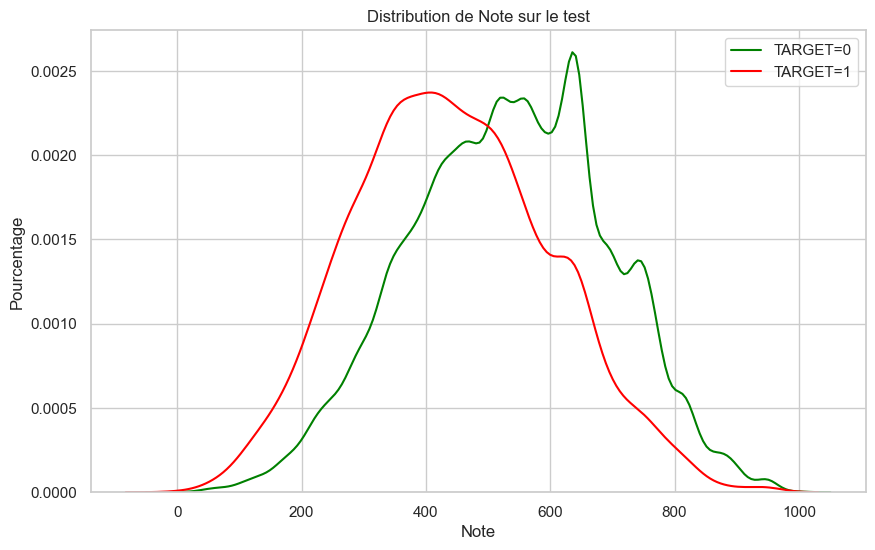

In [264]:
show_conditionnal_density(data_test,"Note")

#### Segmentation -- CHR

In [265]:
from jenkspy import JenksNaturalBreaks

In [266]:
segment=JenksNaturalBreaks(n_classes=7)

In [267]:
segment.fit(data_train["Note"].values)

In [268]:
segment.breaks_

[0, 276, 389, 486, 579, 677, 785, 1000]

In [269]:
data_train["Segment"]=segment.predict(data_train["Note"].values)
data_test["Segment"]=segment.predict(data_test["Note"].values)

In [279]:
data_train["Segment"].value_counts(normalize=True)

Segment
3    0.215452
4    0.208798
2    0.191975
1    0.142925
5    0.133646
0    0.062293
6    0.044910
Name: proportion, dtype: float64

In [278]:
data_train[["Segment","TARGET"]].groupby("Segment").mean()

TARGET
Segment          
0        0.183469
1        0.129130
2        0.092107
3        0.063943
4        0.047019
5        0.030741
6        0.024474

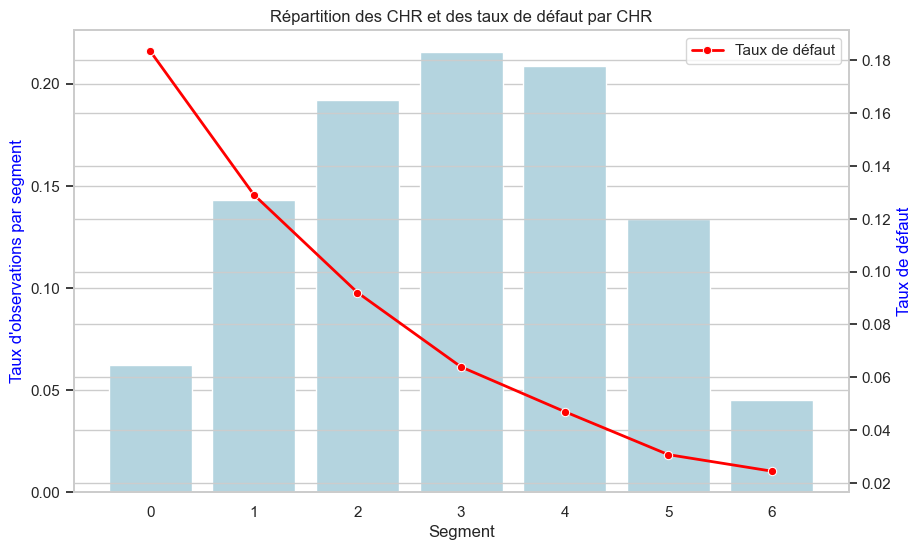

In [282]:
mean_target_by_segment = data_train.groupby('Segment')['TARGET'].mean().reset_index()

# Configurer le style seaborn
# sns.set(style="whitegrid")

# Créer le graphique
plt.figure(figsize=(10, 6))
ax = sns.barplot(data_train['Segment'].value_counts(normalize=True), color='lightblue', label='Distribution des Segments')
ax2 = ax.twinx()
sns.lineplot(x='Segment', y='TARGET', data=mean_target_by_segment, marker='o', color='red', linewidth=2, label='Taux de défaut')

# Ajouter des étiquettes et un titre
ax.set_ylabel('Taux d\'observations par segment', color='blue')
ax2.set_ylabel('Taux de défaut', color='blue')
plt.title('Répartition des CHR et des taux de défaut par CHR')

# Afficher le graphique
plt.show()

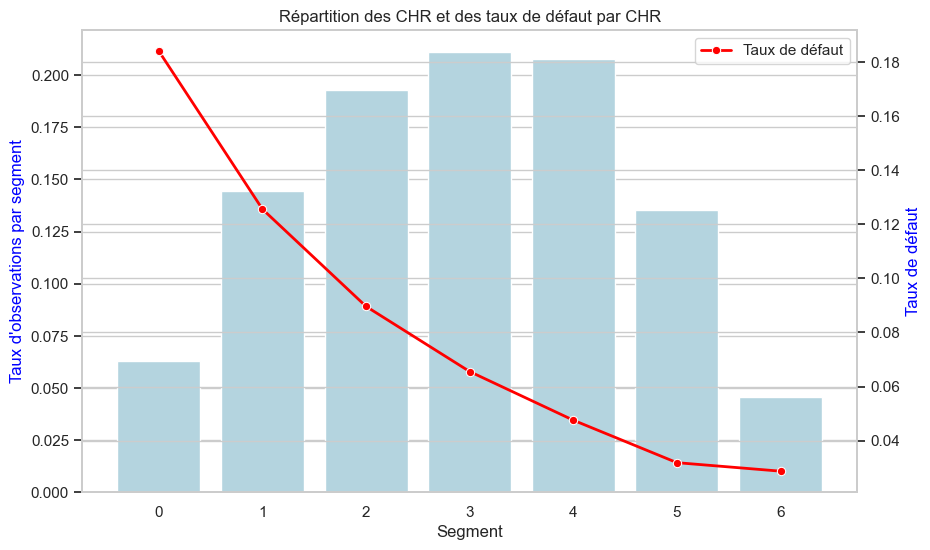

In [284]:
mean_target_by_segment = data_test.groupby('Segment')['TARGET'].mean().reset_index()

# Configurer le style seaborn
# sns.set(style="whitegrid")

# Créer le graphique
plt.figure(figsize=(10, 6))
ax = sns.barplot(data_test['Segment'].value_counts(normalize=True), color='lightblue', label='Distribution des Segments')
ax2 = ax.twinx()
sns.lineplot(x='Segment', y='TARGET', data=mean_target_by_segment, marker='o', color='red', linewidth=2, label='Taux de défaut')

# Ajouter des étiquettes et un titre
ax.set_ylabel('Taux d\'observations par segment', color='blue')
ax2.set_ylabel('Taux de défaut', color='blue')
plt.title('Répartition des CHR et des taux de défaut par CHR')

# Afficher le graphique
plt.show()

In [180]:
data_test[["Segment","TARGET"]].groupby("Segment").mean()

TARGET
Segment          
0        0.184081
1        0.125614
2        0.089641
3        0.065546
4        0.047559
5        0.031845
6        0.028696

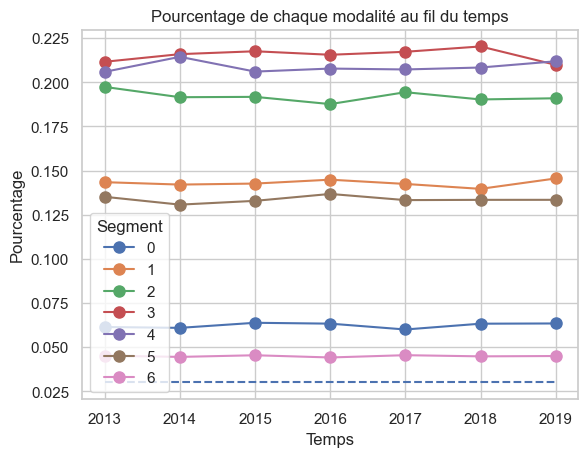

In [190]:
show_volume_stability_overtime(data_train,"Segment",0.03)

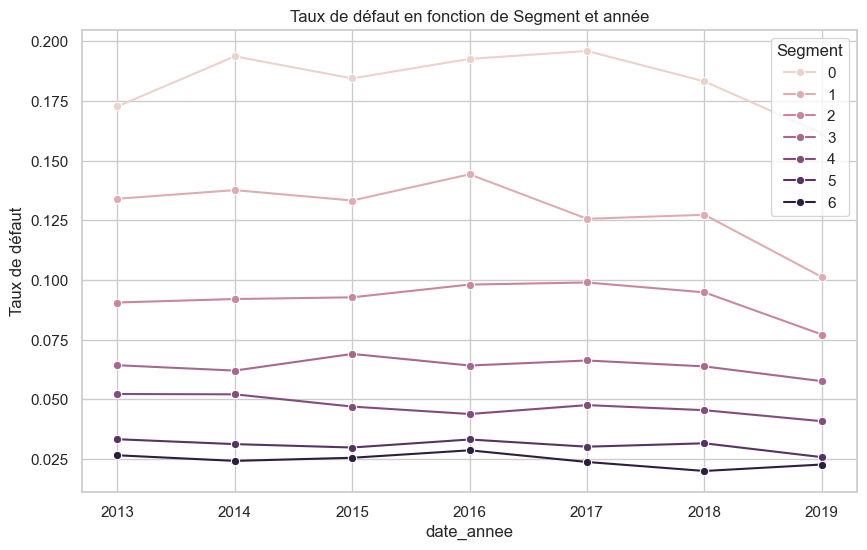

In [191]:
show_risk_stability_overtime(data_train,"Segment")

#### Model calibration (méthodes d'inférence non paramétrique)

##### MoC C

In [184]:
# Nombre d'échantillons bootstrap par segment
num_bootstrap_samples = 1000
moc_segment={}
# Fonction pour calculer le taux de 1 dans un échantillon bootstrap
def calculate_rate_of_ones(sample):
    return np.mean(sample)

# Boucle pour chaque segment
for segment in range(7):
    # Générer des échantillons bootstrap
    sample_size=data_test[data_test["Segment"]==segment].shape[0]
    # list_ids=data_test[data_test["Segment"]==segment]["ID"].values
    # bootstrap_samples = [np.random.choice([0, 1], size=sample_size, replace=True) for _ in range(num_bootstrap_samples)]
    bootstrap_samples = [data_test[data_test["Segment"]==segment].sample(frac=1, replace=True)["TARGET"].values for _ in range(num_bootstrap_samples)]
    
    # Calculer le taux de 1 pour chaque échantillon bootstrap
    rates_of_ones = [calculate_rate_of_ones(sample) for sample in bootstrap_samples]
    
    # Calculer le 90e centile et la moyenne
    percentile_90 = np.percentile(rates_of_ones, 90)
    mean_rate = np.mean(rates_of_ones)
    moc=percentile_90 - mean_rate
    moc_segment[segment]=moc
    # Créer un DataFrame temporaire pour le segment actuel
    temp_df = pd.DataFrame({
        'Size':[sample_size],
        'Segment': [segment],
        'Percentile_90': [percentile_90],
        'Mean_Rate': [mean_rate],
        "MoC_C": [moc]
    })
    
    print(temp_df)

   Size  Segment  Percentile_90  Mean_Rate     MoC_C
0  5063        0       0.191191   0.184267  0.006924
    Size  Segment  Percentile_90  Mean_Rate     MoC_C
0  11607        1       0.129405    0.12558  0.003824
    Size  Segment  Percentile_90  Mean_Rate     MoC_C
0  15484        2       0.092489    0.08961  0.002879
    Size  Segment  Percentile_90  Mean_Rate     MoC_C
0  16950        3       0.067847   0.065614  0.002232
    Size  Segment  Percentile_90  Mean_Rate     MoC_C
0  16695        4       0.049656   0.047525  0.002131
    Size  Segment  Percentile_90  Mean_Rate     MoC_C
0  10865        5       0.033962   0.031834  0.002128
   Size  Segment  Percentile_90  Mean_Rate     MoC_C
0  3659        6       0.032249   0.028726  0.003524


In [186]:
moc_segment

{0: 0.006923563104878544,
 1: 0.0038243301456017953,
 2: 0.0028788426763110414,
 3: 0.002232330383480835,
 4: 0.002130518119197365,
 5: 0.00212820984813622,
 6: 0.0035236403388904033}

##### MoC A

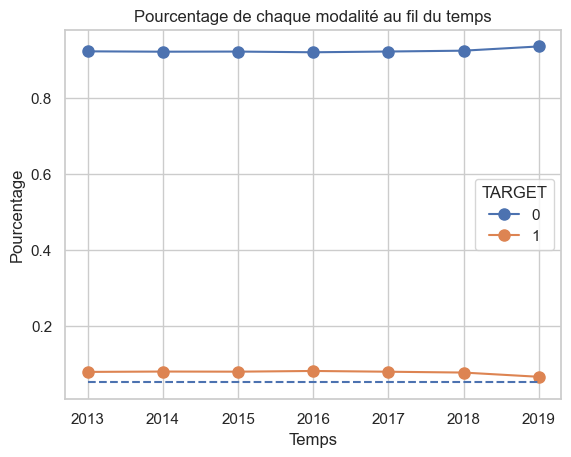

In [285]:
show_volume_stability_overtime(data_train,"TARGET")

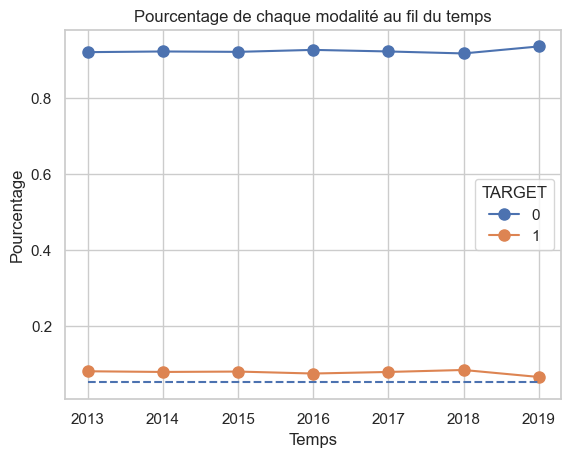

In [286]:
show_volume_stability_overtime(data_test,"TARGET")

In [287]:
# Quantification :
deficiency_impact=((data.loc[data["date_annee"]<2019,"TARGET"].mean())/(data["TARGET"].mean()) - 1 )*100

In [288]:
deficiency_impact

2.4928630946804864

In [291]:
segment=1
bootstrap_samples=5
[data_test[data_test["Segment"]==segment].sample(frac=1, replace=True)[["TARGET","date_annee"]] for _ in range(num_bootstrap_samples)]

[        TARGET  date_annee
 265010       0        2019
 239970       0        2019
 44263        0        2014
 266304       0        2019
 258645       1        2019
 ...        ...         ...
 148739       0        2016
 55133        0        2014
 21314        0        2013
 106428       0        2015
 78284        1        2015
 
 [11607 rows x 2 columns],
         TARGET  date_annee
 33403        0        2013
 182165       0        2017
 855          1        2013
 231806       0        2019
 65589        0        2014
 ...        ...         ...
 258621       0        2019
 242940       0        2019
 44309        0        2014
 245520       1        2019
 101003       0        2015
 
 [11607 rows x 2 columns],
         TARGET  date_annee
 202531       0        2018
 124732       0        2016
 68916        0        2014
 55571        0        2014
 146946       0        2016
 ...        ...         ...
 57668        1        2014
 217662       0        2018
 127143       0   

In [ ]:
# Nombre d'échantillons bootstrap par segment
num_bootstrap_samples = 1000
moc_a_segment={}
# Fonction pour calculer le taux de 1 dans un échantillon bootstrap
def calculate_ajustment(sample:pd.DataFrame):
    ajustement=sample.loc[sample["date_annee"]<2019,"TARGET"].mean()- sample["TARGET"].mean()
    return ajustement
# Boucle pour chaque segment
for segment in range(7):
    # Générer des échantillons bootstrap
    sample_size=data_test[data_test["Segment"]==segment].shape[0]
    # list_ids=data_test[data_test["Segment"]==segment]["ID"].values
    # bootstrap_samples = [np.random.choice([0, 1], size=sample_size, replace=True) for _ in range(num_bootstrap_samples)]
    bootstrap_samples = [data_test[data_test["Segment"]==segment].sample(frac=1, replace=True)["TARGET","date_annee"] for _ in range(num_bootstrap_samples)]
    
    # Calculer le taux de 1 pour chaque échantillon bootstrap
    rates_of_ones = [calculate_rate_of_ones(sample) for sample in bootstrap_samples]
    
    # Calculer le 90e centile et la moyenne
    percentile_90 = np.percentile(rates_of_ones, 90)
    mean_rate = np.mean(rates_of_ones)
    moc=percentile_90 - mean_rate
    moc_segment[segment]=moc
    # Créer un DataFrame temporaire pour le segment actuel
    temp_df = pd.DataFrame({
        'Size':[sample_size],
        'Segment': [segment],
        'Percentile_90': [percentile_90],
        'Mean_Rate': [mean_rate],
        "MoC_C": [moc]
    })
    
    print(temp_df)